## Goals: 
- Figure out important variable relationships 
- "operationalize" variables (i.e. specify what counts as rural etc...) 

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

In [56]:
articleTopics = pd.read_pickle("/shared/3/projects/benlitterer/localNews/MVP1/articleTopicsQuarter.pickle")[1:]

#the missing data for the local news rows have "None" instead of NaN
articleTopics = articleTopics.replace("None", np.nan)
articleTopics.head(3)

,index,docNum,0,1,2,3,4,5,6,7,...,predrt_0,predrt_12,predrt_3,national,id,author,url,published,published_utc,collection_utc
1,1,2973366.0,0.000768,0.000407,0.000307,0.000854,0.000310,0.000165,0.000504,0.000337,...,NaN,NaN,NaN,True,tass--2020-10-02--WHO urges against harsh rest...,NaN,https://tass.com/world/1208071,"Fri, 02 Oct 2020 20:02:33 +0300",1.601683e+09,1.601691e+09
2,2,2241142.0,0.022823,0.000107,0.000081,0.000224,0.000081,0.000043,0.000132,0.000088,...,NaN,NaN,NaN,True,sputnik--2020-04-25--Listen: New Audio Evidenc...,NaN,https://sputniknews.com/us/202004251079087667-...,"Sat, 25 Apr 2020 00:59:58 +0000",1.587791e+09,1.587777e+09
3,3,340177.0,0.000707,0.000375,0.000283,0.000786,0.000285,0.000152,0.000464,0.016177,...,30.96,45.38,23.65,False,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#articleTopics.astype({"rank":"int32", "total_population":"float32", "white_pct":"float32", "black_pct":"float32", "nonwhite_pct":"float32", "foreignborn_pct":"float32", "female_pct":"float32", "age29andunder_pct":"float32", "age65andolder_pct":"float32", "median_hh_inc":"float32", "clf_unemploy_pct":"float32", "lesshs_pct":"float32", "lesscollege_pct"})
newDtypes = dict(zip(list(articleTopics.columns)[88:108], ["float32"] + ["float32" for i in range(88, 108-1)]))
articleTopics = articleTopics.astype(newDtypes)

## Main relationship to understand is Topic ~ Demographic

In [58]:
topicDict = {0:"Trump",
             1:"Crime/Prosecution",
             2:"Subscription_Service",
             3:"Media", 
             4:"Labor/Pandemic/Immigration", 
             5:"Isreal/Palestine/India",
             6:"School/Universities", 
             7:"Royal_Family/Stars", 
             8:"NS1", 
             9:"Outdoor Sports", 
             10:"Business", 
             11:"Data/Information/Privacy", 
             12:"Coronavirus_General", 
             13:"States1", 
             14:"Congress", 
             15:"Middle_East_Conflict", 
             16:"NS2", 
             17:"Community", 
             18:"Military", 
             19:"Democratic_Primary", 
             20:"NS3", 
             21:"NS4", 
             22:"China", 
             23:"BLM/George_Floyd", 
             24:"Sports1", 
             25:"Police_Activity", 
             26:"Months", 
             27:"Trump/Scandals", 
             28:"Southern/Midwestern/Eastern_States", 
             29:"Southwestern_States",
             30:"Severe_Weather", 
             31:"Travel/Flights",
             32:"Baseball", 
             33:"Religion", 
             34:"Basketball", 
             35:"Race",
             36:"Construction", 
             37:"Europe",
             38:"Political_Scandal_General", 
             39:"2020_Election", 
             40:"Veterans", 
             41:"America_as_Institution", 
             42:"Hockey", 
             43:"Family", 
             44:"German_Words", 
             45:"Art/Books/Museums",
             46:"Football", 
             47:"Food Service", 
             48:"NS5", 
             49:"Supreme_Court", 
             50:"Covid_Illness", 
             51:"Sports2", 
             52:"Climate_Fossil_Fuel", 
             53:"Death/Funeral", 
             54:"Covid_Economic", 
             55:"Vaccination", 
             56:"Pandemic_Funding", 
             57:"Covid_Hospitals_Harm_Mitigation", 
             58:"Covid_Negatives/Deaths", 
             59:"Britain", 
             60:"NS6", 
             61:"Entertainment", 
             62:"Health_Products", 
             63:"Science/Space", 
             64:"Wildlife_Farms", 
             65:"NS7", 
             66:"City_Government", 
             67:"Soccer", 
             68:"2020_Election_Fradulence", 
             69:"Community_Public_Service"
            }

## merge manually assigned topic names with their words


In [59]:
topicWords = pd.read_csv("/shared/3/projects/benlitterer/localNews/MVP1/firstMallet/70topics/topicKeys.txt", sep="\t", names=["percentage", "words"]).reset_index()
topicNames = pd.DataFrame.from_dict(topicDict, orient="index").reset_index().rename(columns={0:"Name"})
topicReference = pd.merge(topicWords, topicNames, how="inner", on="index").dropna().rename(columns={"index":"topicNum"}).set_index("Name")
topicReference

,topicNum,percentage,words
Name,,,
Trump,0,0.04459,trump president said white house donald admini...
Crime/Prosecution,1,0.02363,num court prison said charges case charged att...
Subscription_Service,2,0.01783,num access site login please email content cre...
Media,3,0.04957,news media twitter facebook video social post ...
Labor/Pandemic/Immigration,4,0.01799,num workers said work employees border people ...
...,...,...,...
NS7,65,0.02191,time life make people help may feel get take l...
City_Government,66,0.03055,num city county board council meeting said pub...
Soccer,67,0.01105,num league united club season premier game pla...


In [60]:
#rename headings for topics appropriately  
articleTopics = articleTopics.rename(columns=topicDict)

In [61]:
#articleTopics.to_csv("/shared/3/projects/benlitterer/localNews/MVP1/articleTopicsQuarter.csv", quoting=csv.QUOTE_NONNUMERIC)

In [62]:
def plotCorrDf(corrDf): 
    #get correlation between topic proportions
    corr = corrDf.corr()

    #plot correlations
    #from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    fig, ax = plt.subplots(figsize=(11,11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=70, ha="right", rotation_mode="anchor")

## Political Topic Correlations

['Trump', 'Crime/Prosecution', 'Subscription_Service', 'Media', 'Labor/Pandemic/Immigration', 'Isreal/Palestine/India', 'School/Universities', 'Royal_Family/Stars', 'NS1', 'Outdoor Sports', 'Business', 'Data/Information/Privacy', 'Coronavirus_General', 'States1', 'Congress', 'Middle_East_Conflict', 'NS2', 'Community', 'Military', 'Democratic_Primary', 'NS3', 'NS4', 'China', 'BLM/George_Floyd', 'Sports1', 'Police_Activity', 'Months', 'Trump/Scandals', 'Southern/Midwestern/Eastern_States', 'Southwestern_States', 'Severe_Weather', 'Travel/Flights', 'Baseball', 'Religion', 'Basketball', 'Race', 'Construction', 'Europe', 'Political_Scandal_General', '2020_Election', 'Veterans', 'America_as_Institution', 'Hockey', 'Family', 'German_Words', 'Art/Books/Museums', 'Football', 'Food Service', 'NS5', 'Supreme_Court', 'Covid_Illness', 'Sports2', 'Climate_Fossil_Fuel', 'Death/Funeral', 'Covid_Economic', 'Vaccination', 'Pandemic_Funding', 'Covid_Hospitals_Harm_Mitigation', 'Covid_Negatives/Deaths', '

Text(0.5, 1.0, 'Correlation of Topics Related to Politics')

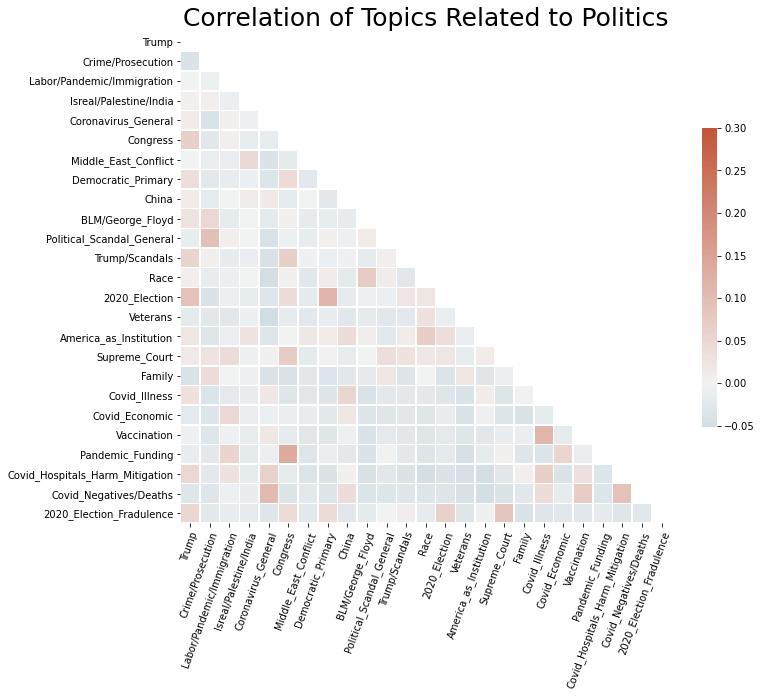

In [63]:
#Get topics that seem like they might have interesting correlations
print(list(articleTopics.iloc[:,2:72].columns))
politicalCorrDf = ["Trump", "Crime/Prosecution", "Labor/Pandemic/Immigration", "Isreal/Palestine/India", "Coronavirus_General", "Congress", "Middle_East_Conflict", "Democratic_Primary", "China", "BLM/George_Floyd", "Political_Scandal_General", "Trump/Scandals", "Race", "2020_Election", "Veterans","America_as_Institution", "Supreme_Court", "Family", "Covid_Illness", "Covid_Economic", "Vaccination", "Pandemic_Funding", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths", "2020_Election_Fradulence"]
corrDf = articleTopics[politicalCorrDf]
plotCorrDf(corrDf)
plt.title("Correlation of Topics Related to Politics", size=25)

## Potentially Geographically Variant Topics

['Trump', 'Crime/Prosecution', 'Subscription_Service', 'Media', 'Labor/Pandemic/Immigration', 'Isreal/Palestine/India', 'School/Universities', 'Royal_Family/Stars', 'NS1', 'Outdoor Sports', 'Business', 'Data/Information/Privacy', 'Coronavirus_General', 'States1', 'Congress', 'Middle_East_Conflict', 'NS2', 'Community', 'Military', 'Democratic_Primary', 'NS3', 'NS4', 'China', 'BLM/George_Floyd', 'Sports1', 'Police_Activity', 'Months', 'Trump/Scandals', 'Southern/Midwestern/Eastern_States', 'Southwestern_States', 'Severe_Weather', 'Travel/Flights', 'Baseball', 'Religion', 'Basketball', 'Race', 'Construction', 'Europe', 'Political_Scandal_General', '2020_Election', 'Veterans', 'America_as_Institution', 'Hockey', 'Family', 'German_Words', 'Art/Books/Museums', 'Football', 'Food Service', 'NS5', 'Supreme_Court', 'Covid_Illness', 'Sports2', 'Climate_Fossil_Fuel', 'Death/Funeral', 'Covid_Economic', 'Vaccination', 'Pandemic_Funding', 'Covid_Hospitals_Harm_Mitigation', 'Covid_Negatives/Deaths', '

Text(0.5, 1.0, 'Correlation of Topics Interesting w.r.t Geography')

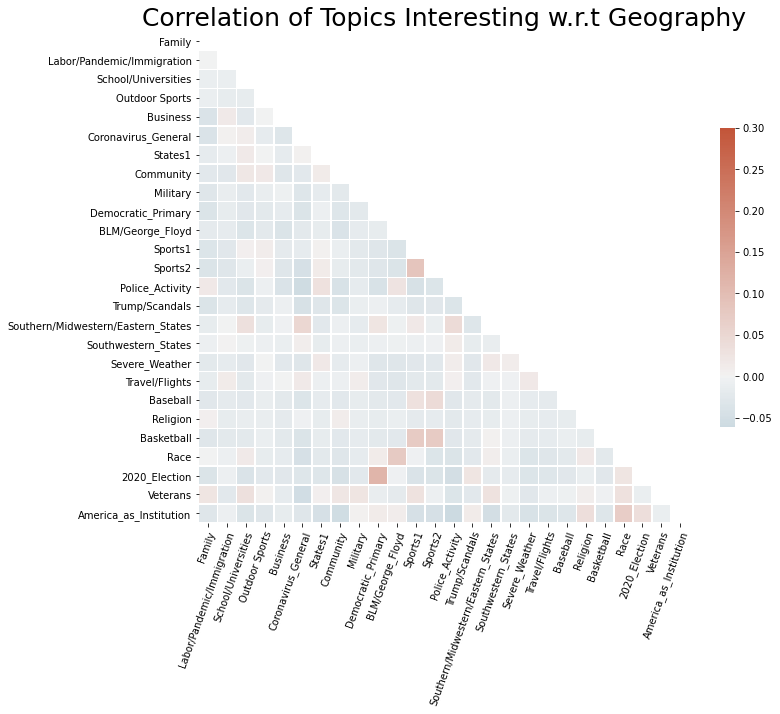

In [64]:
#Get topics that seem like they might have interesting correlations
print(list(articleTopics.iloc[:,2:72].columns))
politicalCorrDf = ["Family", "Labor/Pandemic/Immigration", "School/Universities", "Outdoor Sports", "Business", "Coronavirus_General", "States1", "Community", "Military", "Democratic_Primary", "BLM/George_Floyd", "Sports1", "Sports2", "Police_Activity", "Trump/Scandals", "Southern/Midwestern/Eastern_States", "Southwestern_States", "Severe_Weather", "Travel/Flights", "Baseball", "Religion", "Basketball", "Race", "2020_Election", "Veterans","America_as_Institution"]
corrDf = articleTopics[politicalCorrDf]
plotCorrDf(corrDf)
plt.title("Correlation of Topics Interesting w.r.t Geography", size=25)

## Demographic Correlations

Text(0.5, 1.0, 'Correlation of Demographic Variables')

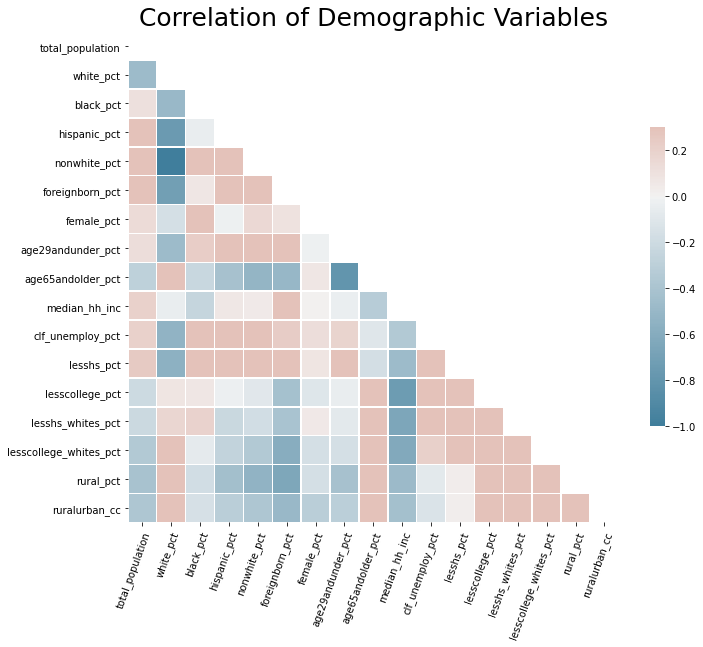

In [65]:
#get the demographic variables of interest
demFrame = articleTopics.loc[articleTopics["national"] == False]
demFrame = demFrame.iloc[:,88:105]
plotCorrDf(demFrame)
plt.title("Correlation of Demographic Variables", size=25)

## Plotting Topics over Time

In [66]:
articleTopics["date"] = pd.to_datetime(articleTopics["date"])

### "America as Insitution" words: 
-world government political people america american war power one even new many states state united right country would public americans

No handles with labels found to put in legend.


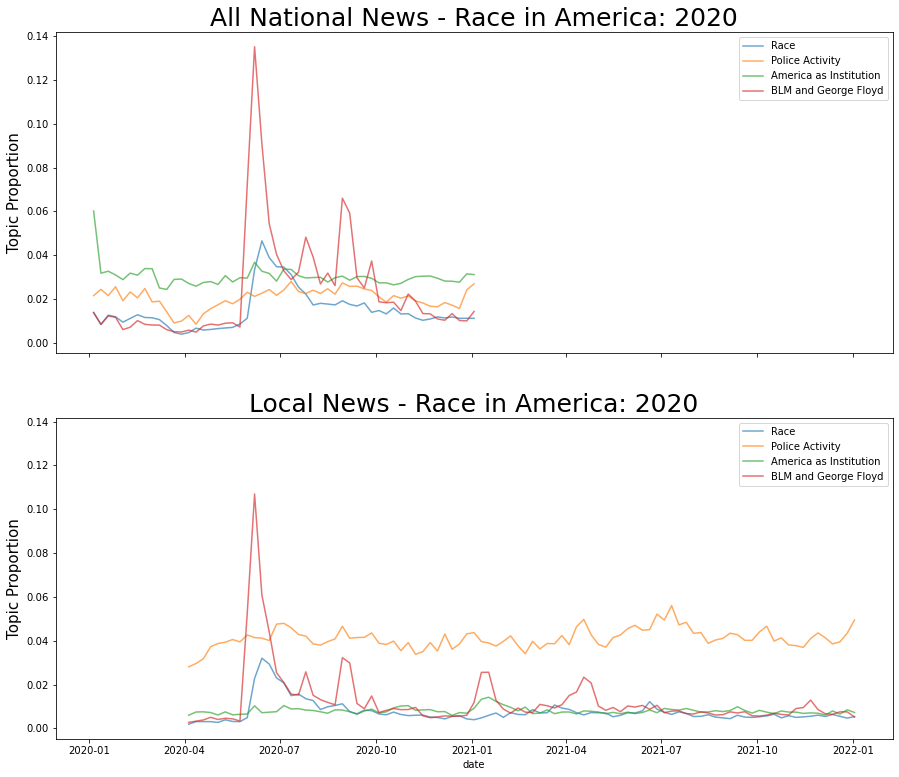

In [14]:
fig, axs = plt.subplots(2, figsize=(15, 13), sharex=True, sharey=True)

## start with national news 
test = articleTopics.loc[articleTopics["national"] == True, ["date", "BLM/George_Floyd", "Race", "Police_Activity", "America_as_Institution"]]
global_alpha = .65
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Race", alpha=global_alpha, label = "Race", ax=axs[0])
sns.lineplot(data=test, x="date", y="Police_Activity", alpha=global_alpha, label = "Police Activity", ax=axs[0])
sns.lineplot(data=test, x="date", y="America_as_Institution", alpha=global_alpha, label= "America as Institution", ax=axs[0])
ax = sns.lineplot(data=test, x="date", y="BLM/George_Floyd", alpha=global_alpha, label = "BLM and George Floyd", ax=axs[0])

axs[0].set_title("All National News - Race in America: 2020", size="25")
axs[0].set_ylabel("Topic Proportion", size=15)
plt.legend()


## now add local level 
test = articleTopics.loc[articleTopics["national"] == False, ["date", "BLM/George_Floyd", "Race", "Police_Activity", "America_as_Institution"]]
global_alpha = .65
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Race", alpha=global_alpha, label = "Race", ax=axs[1])
sns.lineplot(data=test, x="date", y="Police_Activity", alpha=global_alpha, label = "Police Activity", ax=axs[1])
sns.lineplot(data=test, x="date", y="America_as_Institution", alpha=global_alpha, label= "America as Institution", ax=axs[1])
ax = sns.lineplot(data=test, x="date", y="BLM/George_Floyd", alpha=global_alpha, label = "BLM and George Floyd", ax=axs[1])
axs[1].set_title("Local News - Race in America: 2020", size="25")
axs[1].set_ylabel("Topic Proportion", size=15)
plt.legend()

### NOTES: 
- Police activity covered more relative to BLM in local news - makes sense. 
- America as institution covered more in (inter)national news - makes sense 

In [15]:
articleTopics.iloc[:,72:].columns

Index(['article_id', 'sourcedomain_id', 'date', 'title', 'content', 'url_x',
       'fips', 'source', 'description', 'onlinesince', 'rank', 'state', 'city',
       'lon', 'lat', 'county', 'total_population', 'white_pct', 'black_pct',
       'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'female_pct',
       'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc',
       'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
       'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct',
       'ruralurban_cc', 'predrt_0', 'predrt_12', 'predrt_3', 'national', 'id',
       'author', 'url', 'published', 'published_utc', 'collection_utc'],
      dtype='object')

No handles with labels found to put in legend.


(11100, 5)
(149004, 5)


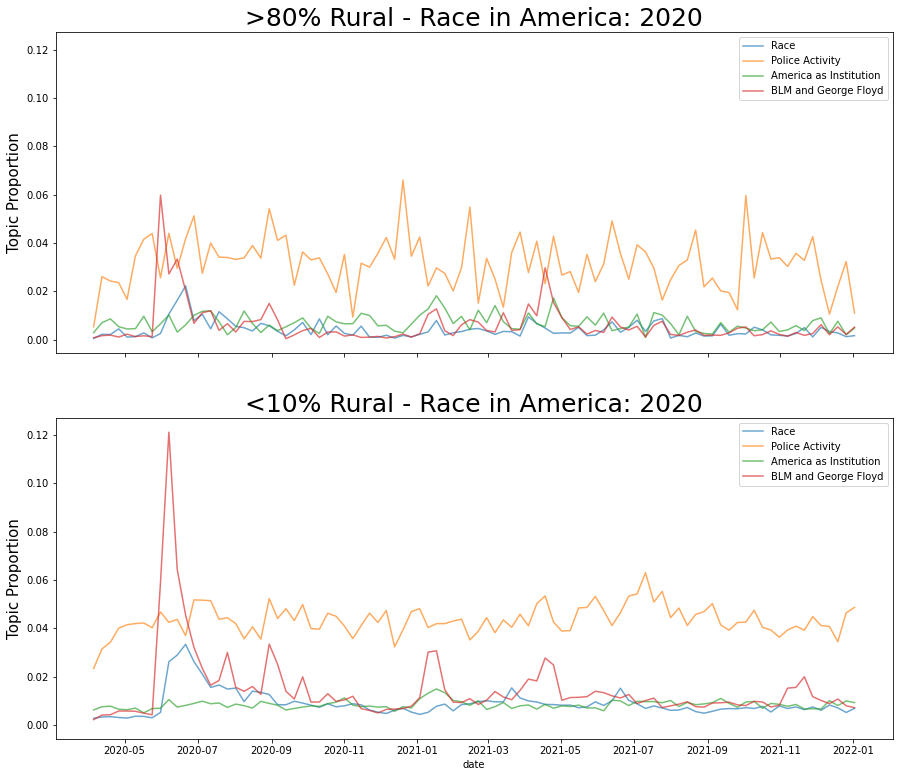

In [16]:
fig, axs = plt.subplots(2, figsize=(15, 13), sharex=True, sharey=True)

## start with national news 
test = articleTopics.loc[articleTopics["rural_pct"] > 80, ["date", "BLM/George_Floyd", "Race", "Police_Activity", "America_as_Institution"]]
print(test.shape)
global_alpha = .65
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Race", alpha=global_alpha, label = "Race", ax=axs[0])
sns.lineplot(data=test, x="date", y="Police_Activity", alpha=global_alpha, label = "Police Activity", ax=axs[0])
sns.lineplot(data=test, x="date", y="America_as_Institution", alpha=global_alpha, label= "America as Institution", ax=axs[0])
ax = sns.lineplot(data=test, x="date", y="BLM/George_Floyd", alpha=global_alpha, label = "BLM and George Floyd", ax=axs[0])

axs[0].set_title(">80% Rural - Race in America: 2020", size="25")
axs[0].set_ylabel("Topic Proportion", size=15)
plt.legend()

## now add local level 
test = articleTopics.loc[articleTopics["rural_pct"] < 10, ["date", "BLM/George_Floyd", "Race", "Police_Activity", "America_as_Institution"]]
print(test.shape)
global_alpha = .65
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Race", alpha=global_alpha, label = "Race", ax=axs[1])
sns.lineplot(data=test, x="date", y="Police_Activity", alpha=global_alpha, label = "Police Activity", ax=axs[1])
sns.lineplot(data=test, x="date", y="America_as_Institution", alpha=global_alpha, label= "America as Institution", ax=axs[1])
ax = sns.lineplot(data=test, x="date", y="BLM/George_Floyd", alpha=global_alpha, label = "BLM and George Floyd", ax=axs[1])
axs[1].set_title("<10% Rural - Race in America: 2020", size="25")
axs[1].set_ylabel("Topic Proportion", size=15)
plt.legend()

### NOTES: 
- Original spike in BLM coverage around murder of George Floyd is much smaller in rural areas 

No handles with labels found to put in legend.


(21807, 5)
(91885, 5)


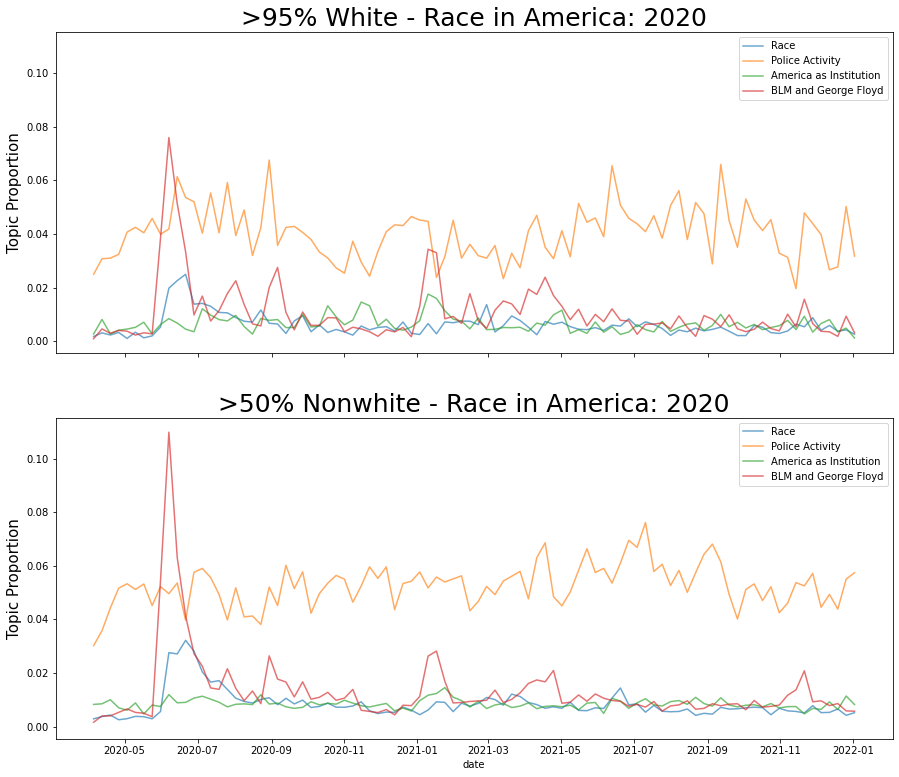

In [17]:
fig, axs = plt.subplots(2, figsize=(15, 13), sharex=True, sharey=True)

## start with national news 
test = articleTopics.loc[articleTopics["white_pct"] > 95, ["date", "BLM/George_Floyd", "Race", "Police_Activity", "America_as_Institution"]]
print(test.shape)
global_alpha = .65
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Race", alpha=global_alpha, label = "Race", ax=axs[0])
sns.lineplot(data=test, x="date", y="Police_Activity", alpha=global_alpha, label = "Police Activity", ax=axs[0])
sns.lineplot(data=test, x="date", y="America_as_Institution", alpha=global_alpha, label= "America as Institution", ax=axs[0])
ax = sns.lineplot(data=test, x="date", y="BLM/George_Floyd", alpha=global_alpha, label = "BLM and George Floyd", ax=axs[0])

axs[0].set_title(">95% White - Race in America: 2020", size="25")
axs[0].set_ylabel("Topic Proportion", size=15)
plt.legend()

## now add local level 
test = articleTopics.loc[articleTopics["nonwhite_pct"] > 50, ["date", "BLM/George_Floyd", "Race", "Police_Activity", "America_as_Institution"]]
print(test.shape)
global_alpha = .65
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Race", alpha=global_alpha, label = "Race", ax=axs[1])
sns.lineplot(data=test, x="date", y="Police_Activity", alpha=global_alpha, label = "Police Activity", ax=axs[1])
sns.lineplot(data=test, x="date", y="America_as_Institution", alpha=global_alpha, label= "America as Institution", ax=axs[1])
ax = sns.lineplot(data=test, x="date", y="BLM/George_Floyd", alpha=global_alpha, label = "BLM and George Floyd", ax=axs[1])
axs[1].set_title(">50% Nonwhite - Race in America: 2020", size="25")
axs[1].set_ylabel("Topic Proportion", size=15)
plt.legend()

### NOTES: 
- Very similar trend, we don't see quite as big of a spike in very white areas 

No handles with labels found to put in legend.


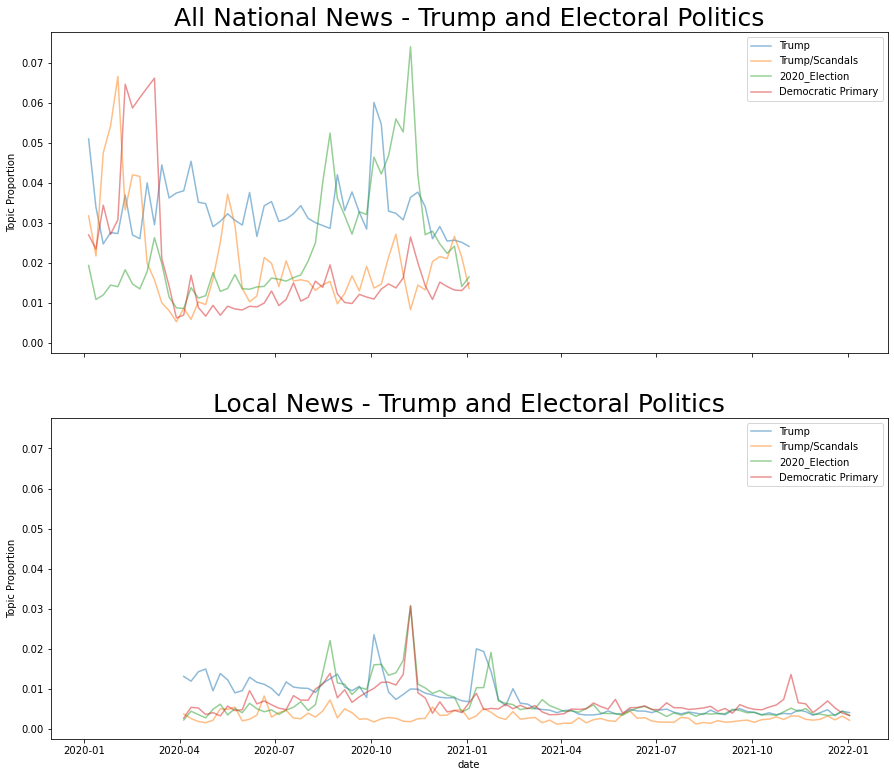

In [18]:
fig, axs = plt.subplots(2, figsize=(15, 13), sharex=True, sharey=True)
global_alpha = .5

test = articleTopics.loc[articleTopics["national"] == True, ["date", "Trump", "Trump/Scandals", "2020_Election", "Democratic_Primary"]]
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Trump", alpha=global_alpha, label = "Trump", ax = axs[0])
sns.lineplot(data=test, x="date", y="Trump/Scandals", alpha=global_alpha, label = "Trump/Scandals", ax = axs[0])
sns.lineplot(data=test, x="date", y="2020_Election", alpha=global_alpha, label= "2020_Election", ax = axs[0])
sns.lineplot(data=test, x="date", y="Democratic_Primary", alpha=global_alpha, label = "Democratic Primary", ax = axs[0])

axs[0].set_title("All National News - Trump and Electoral Politics", size=25)
axs[0].set_ylabel("Topic Proportion")
plt.legend()

test = articleTopics.loc[articleTopics["national"] == False, ["date", "Trump", "Trump/Scandals", "2020_Election", "Democratic_Primary"]]
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Trump", alpha=global_alpha, label = "Trump", ax = axs[1])
sns.lineplot(data=test, x="date", y="Trump/Scandals", alpha=global_alpha, label = "Trump/Scandals", ax = axs[1])
sns.lineplot(data=test, x="date", y="2020_Election", alpha=global_alpha, label= "2020_Election", ax = axs[1])
sns.lineplot(data=test, x="date", y="Democratic_Primary", alpha=global_alpha, label = "Democratic Primary", ax = axs[1])

axs[1].set_title("Local News - Trump and Electoral Politics", size=25)
axs[1].set_ylabel("Topic Proportion")
plt.legend()

### NOTES: 
- January 16: Start of Impeachment Trials 
- Dem. Primary and Election spikes make sense as well 
- Local news doesn't seem to focus a whole lot on Trump and electoral politics at the national level - intuitive 

No handles with labels found to put in legend.


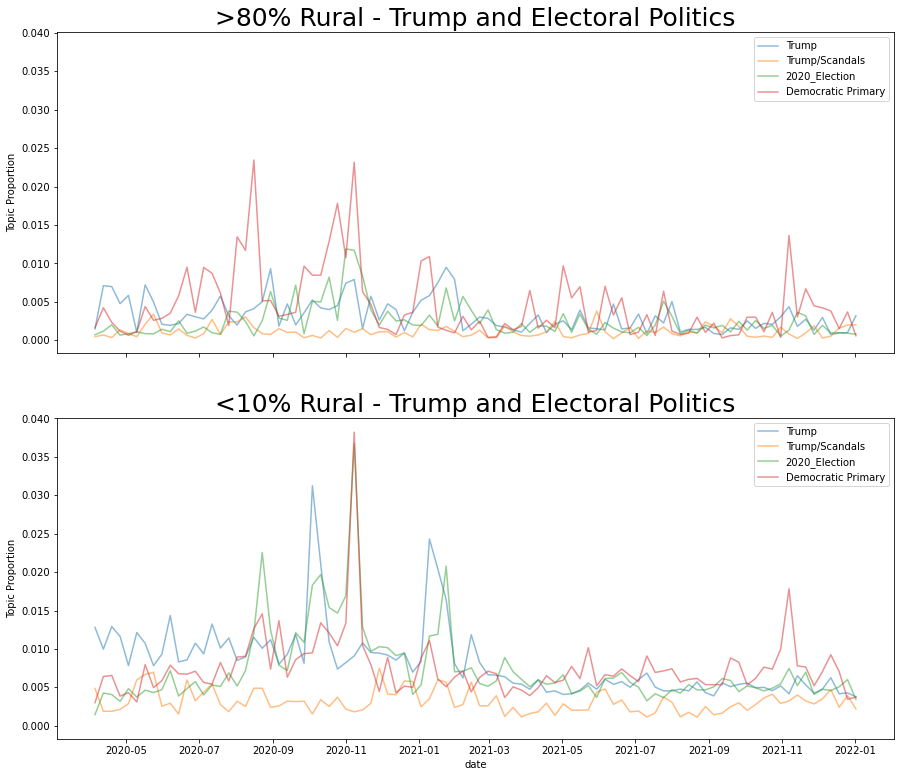

In [19]:
fig, axs = plt.subplots(2, figsize=(15, 13), sharex=True, sharey=True)
global_alpha = .5

test = articleTopics.loc[articleTopics["rural_pct"] > 80, ["date", "Trump", "Trump/Scandals", "2020_Election", "Democratic_Primary"]]
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Trump", alpha=global_alpha, label = "Trump", ax = axs[0])
sns.lineplot(data=test, x="date", y="Trump/Scandals", alpha=global_alpha, label = "Trump/Scandals", ax = axs[0])
sns.lineplot(data=test, x="date", y="2020_Election", alpha=global_alpha, label= "2020_Election", ax = axs[0])
sns.lineplot(data=test, x="date", y="Democratic_Primary", alpha=global_alpha, label = "Democratic Primary", ax = axs[0])

axs[0].set_title(">80% Rural - Trump and Electoral Politics", size=25)
axs[0].set_ylabel("Topic Proportion")
plt.legend()

test = articleTopics.loc[articleTopics["rural_pct"] < 10, ["date", "Trump", "Trump/Scandals", "2020_Election", "Democratic_Primary"]]
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Trump", alpha=global_alpha, label = "Trump", ax = axs[1])
sns.lineplot(data=test, x="date", y="Trump/Scandals", alpha=global_alpha, label = "Trump/Scandals", ax = axs[1])
sns.lineplot(data=test, x="date", y="2020_Election", alpha=global_alpha, label= "2020_Election", ax = axs[1])
sns.lineplot(data=test, x="date", y="Democratic_Primary", alpha=global_alpha, label = "Democratic Primary", ax = axs[1])

axs[1].set_title("<10% Rural - Trump and Electoral Politics", size=25)
axs[1].set_ylabel("Topic Proportion")
plt.legend()

### NOTES: 
- not sure what to make of this.. modelling might be more useful 

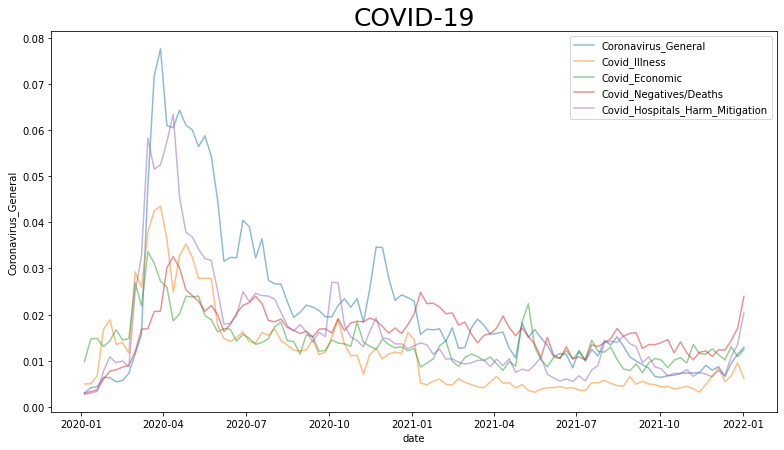

In [20]:
test = articleTopics[["date", "Coronavirus_General", "Covid_Illness", "Covid_Economic", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths"]]

global_alpha = .5
test = test.set_index(test["date"]).resample("W").mean().reset_index()
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=test, x="date", y="Coronavirus_General", alpha=global_alpha, label = "Coronavirus_General")
sns.lineplot(data=test, x="date", y="Covid_Illness", alpha=global_alpha, label = "Covid_Illness")
sns.lineplot(data=test, x="date", y="Covid_Economic", alpha=global_alpha, label = "Covid_Economic")
sns.lineplot(data=test, x="date", y="Covid_Negatives/Deaths", alpha=global_alpha, label= "Covid_Negatives/Deaths")
ax = sns.lineplot(data=test, x="date", y="Covid_Hospitals_Harm_Mitigation", alpha=global_alpha, label = "Covid_Hospitals_Harm_Mitigation")

plt.title("COVID-19", size=25)
plt.legend()

No handles with labels found to put in legend.


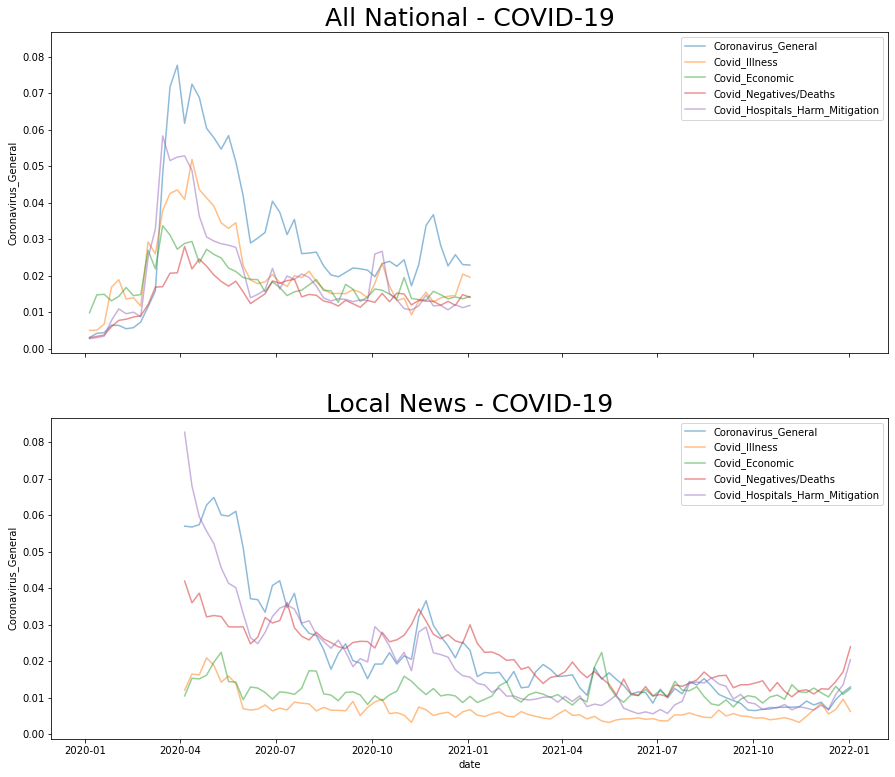

In [21]:
fig, axs = plt.subplots(2, figsize=(15, 13), sharex=True, sharey=True)
test = articleTopics.loc[articleTopics["national"]==True, ["date", "Coronavirus_General", "Covid_Illness", "Covid_Economic", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths"]]

global_alpha = .5
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Coronavirus_General", alpha=global_alpha, label = "Coronavirus_General", ax=axs[0])
sns.lineplot(data=test, x="date", y="Covid_Illness", alpha=global_alpha, label = "Covid_Illness", ax=axs[0])
sns.lineplot(data=test, x="date", y="Covid_Economic", alpha=global_alpha, label = "Covid_Economic", ax=axs[0])
sns.lineplot(data=test, x="date", y="Covid_Negatives/Deaths", alpha=global_alpha, label= "Covid_Negatives/Deaths", ax=axs[0])
sns.lineplot(data=test, x="date", y="Covid_Hospitals_Harm_Mitigation", alpha=global_alpha, label = "Covid_Hospitals_Harm_Mitigation", ax=axs[0])

axs[0].set_title("All National - COVID-19", size=25)
plt.legend()

test = articleTopics.loc[articleTopics["national"]==False, ["date", "Coronavirus_General", "Covid_Illness", "Covid_Economic", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths"]]
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Coronavirus_General", alpha=global_alpha, label = "Coronavirus_General", ax=axs[1])
sns.lineplot(data=test, x="date", y="Covid_Illness", alpha=global_alpha, label = "Covid_Illness", ax=axs[1])
sns.lineplot(data=test, x="date", y="Covid_Economic", alpha=global_alpha, label = "Covid_Economic", ax=axs[1])
sns.lineplot(data=test, x="date", y="Covid_Negatives/Deaths", alpha=global_alpha, label= "Covid_Negatives/Deaths", ax=axs[1])
ax = sns.lineplot(data=test, x="date", y="Covid_Hospitals_Harm_Mitigation", alpha=global_alpha, label = "Covid_Hospitals_Harm_Mitigation", ax=axs[1])

axs[1].set_title("Local News - COVID-19", size=25)
plt.legend()

,date,Coronavirus_General,Covid_Illness,Covid_Economic,Covid_Hospitals_Harm_Mitigation,Covid_Negatives/Deaths


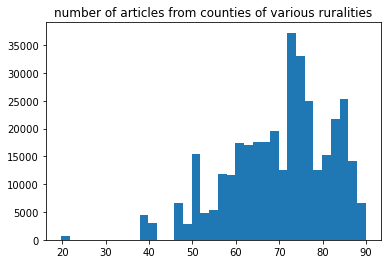

In [67]:
#test = articleTopics.loc[articleTopics["lesscollege_pct"] < .9, ["date", "Coronavirus_General", "Covid_Illness", "Covid_Economic", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths"]]
#test = test.set_index(test["date"]).resample("W").mean().reset_index(drop=True)
plt.hist(articleTopics["lesscollege_pct"], bins = 35)
plt.title("number of articles from counties of various ruralities")
test = articleTopics.loc[articleTopics["lesscollege_pct"] < 9, ["date", "Coronavirus_General", "Covid_Illness", "Covid_Economic", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths"]]
test = test.set_index(test["date"]).resample("W").mean().reset_index(drop=True)
test

No handles with labels found to put in legend.


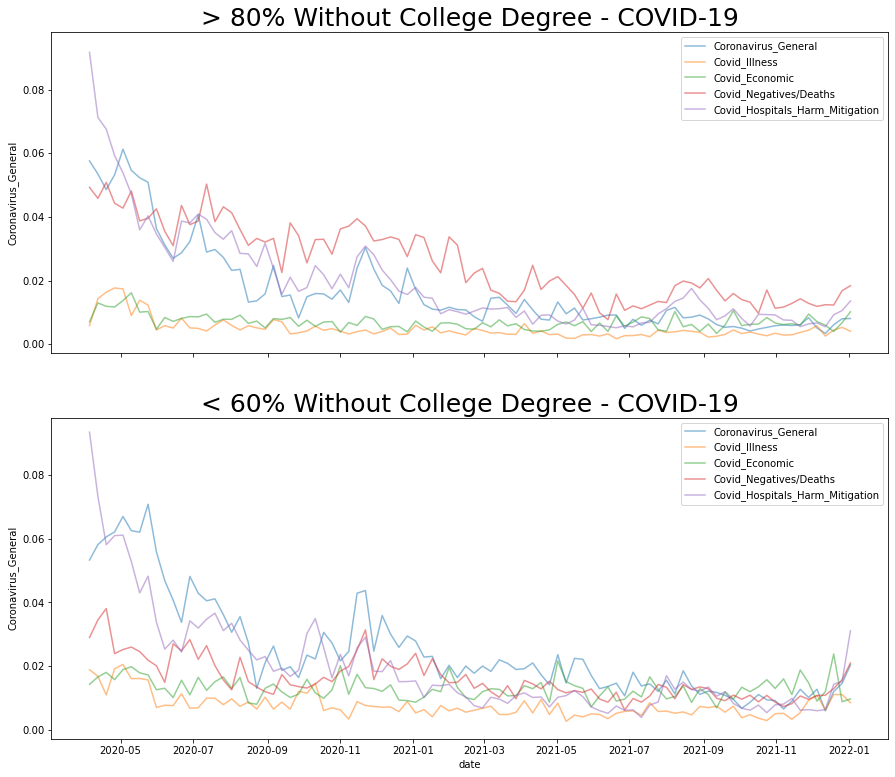

In [68]:
fig, axs = plt.subplots(2, figsize=(15, 13), sharex=True, sharey=True)
test = articleTopics.loc[articleTopics["lesscollege_pct"] >80, ["date", "Coronavirus_General", "Covid_Illness", "Covid_Economic", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths"]]

global_alpha = .5
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Coronavirus_General", alpha=global_alpha, label = "Coronavirus_General", ax=axs[0])
sns.lineplot(data=test, x="date", y="Covid_Illness", alpha=global_alpha, label = "Covid_Illness", ax=axs[0])
sns.lineplot(data=test, x="date", y="Covid_Economic", alpha=global_alpha, label = "Covid_Economic", ax=axs[0])
sns.lineplot(data=test, x="date", y="Covid_Negatives/Deaths", alpha=global_alpha, label= "Covid_Negatives/Deaths", ax=axs[0])
sns.lineplot(data=test, x="date", y="Covid_Hospitals_Harm_Mitigation", alpha=global_alpha, label = "Covid_Hospitals_Harm_Mitigation", ax=axs[0])

axs[0].set_title("> 80% Without College Degree - COVID-19", size=25)
plt.legend()

test = articleTopics.loc[articleTopics["lesscollege_pct"] < 60, ["date", "Coronavirus_General", "Covid_Illness", "Covid_Economic", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths"]]
test = test.set_index(test["date"]).resample("W").mean().reset_index()
sns.lineplot(data=test, x="date", y="Coronavirus_General", alpha=global_alpha, label = "Coronavirus_General", ax=axs[1])
sns.lineplot(data=test, x="date", y="Covid_Illness", alpha=global_alpha, label = "Covid_Illness", ax=axs[1])
sns.lineplot(data=test, x="date", y="Covid_Economic", alpha=global_alpha, label = "Covid_Economic", ax=axs[1])
sns.lineplot(data=test, x="date", y="Covid_Negatives/Deaths", alpha=global_alpha, label= "Covid_Negatives/Deaths", ax=axs[1])
ax = sns.lineplot(data=test, x="date", y="Covid_Hospitals_Harm_Mitigation", alpha=global_alpha, label = "Covid_Hospitals_Harm_Mitigation", ax=axs[1])

axs[1].set_title("< 60% Without College Degree - COVID-19", size=25)
plt.legend()

### NOTES: 
- interestingly, the negatives COVID category seems more prevalent in the less educated areas, relative to the general category 

In [69]:
print(list(articleTopics.columns))

['index', 'docNum', 'Trump', 'Crime/Prosecution', 'Subscription_Service', 'Media', 'Labor/Pandemic/Immigration', 'Isreal/Palestine/India', 'School/Universities', 'Royal_Family/Stars', 'NS1', 'Outdoor Sports', 'Business', 'Data/Information/Privacy', 'Coronavirus_General', 'States1', 'Congress', 'Middle_East_Conflict', 'NS2', 'Community', 'Military', 'Democratic_Primary', 'NS3', 'NS4', 'China', 'BLM/George_Floyd', 'Sports1', 'Police_Activity', 'Months', 'Trump/Scandals', 'Southern/Midwestern/Eastern_States', 'Southwestern_States', 'Severe_Weather', 'Travel/Flights', 'Baseball', 'Religion', 'Basketball', 'Race', 'Construction', 'Europe', 'Political_Scandal_General', '2020_Election', 'Veterans', 'America_as_Institution', 'Hockey', 'Family', 'German_Words', 'Art/Books/Museums', 'Football', 'Food Service', 'NS5', 'Supreme_Court', 'Covid_Illness', 'Sports2', 'Climate_Fossil_Fuel', 'Death/Funeral', 'Covid_Economic', 'Vaccination', 'Pandemic_Funding', 'Covid_Hospitals_Harm_Mitigation', 'Covid_N

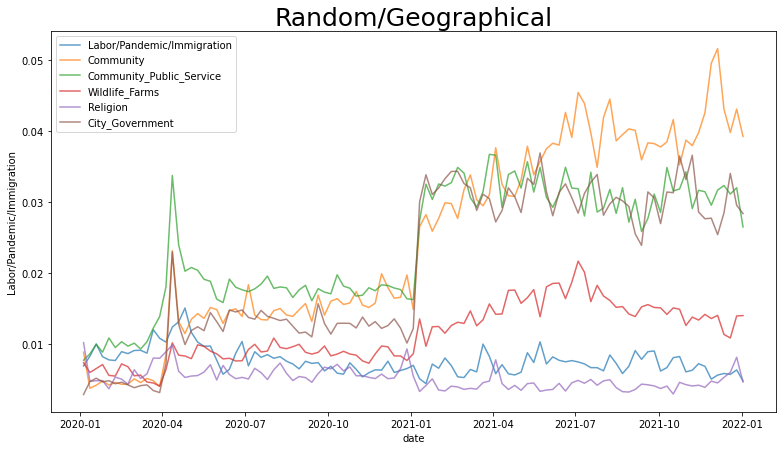

In [70]:
test = articleTopics[["date", "Labor/Pandemic/Immigration", "Community", "Community_Public_Service", "City_Government", "Wildlife_Farms", "Religion"]]
global_alpha = .7
test = test.set_index(test["date"]).resample("W").mean().reset_index()
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=test, x="date", y="Labor/Pandemic/Immigration", alpha=global_alpha, label = "Labor/Pandemic/Immigration")
sns.lineplot(data=test, x="date", y="Community", alpha=global_alpha, label = "Community")
sns.lineplot(data=test, x="date", y="Community_Public_Service", alpha=global_alpha, label= "Community_Public_Service")
sns.lineplot(data=test, x="date", y="Wildlife_Farms", alpha=global_alpha, label= "Wildlife_Farms")
sns.lineplot(data=test, x="date", y="Religion", alpha=global_alpha, label= "Religion")
ax = sns.lineplot(data=test, x="date", y="City_Government", alpha=global_alpha, label = "City_Government")

plt.title("Random/Geographical", size=25)
plt.legend()

## NOTES: 
- Resampled to the week level, with topics averaged 
- Strange how quickly the community topics spike 
- Trump and COVID have the opposite trend, they die down when 2021 starts 

## Topic - Demographic Correlations 

In [26]:
"""
interestColumns = ["source", "BLM/George_Floyd", "Race", "Police_Activity", "America_as_Institution", "rural_pct", "white_pct", "age29andunder_pct", "age65andolder_pct", "median_hh_inc"]
test = articleTopics[interestColumns].dropna()
test = test.groupby(by=["source"]).agg(np.mean).reset_index()
#.resample("M").mean().reset_index().drop(columns=["date"])
#ax = sns.pairplot(test)
sns.pairplot(test, corner=True)
"""

'\ninterestColumns = ["source", "BLM/George_Floyd", "Race", "Police_Activity", "America_as_Institution", "rural_pct", "white_pct", "age29andunder_pct", "age65andolder_pct", "median_hh_inc"]\ntest = articleTopics[interestColumns].dropna()\ntest = test.groupby(by=["source"]).agg(np.mean).reset_index()\n#.resample("M").mean().reset_index().drop(columns=["date"])\n#ax = sns.pairplot(test)\nsns.pairplot(test, corner=True)\n'

# In Anticipation of Modeling 

## M1: 
### model specification: 

At the ARTICLE level: 
rural_pct_for_article_outlet ~ (1|month) + race_topic_% + Religion_Topic_% + ... 

### response = rural_pct of county where article was produced 
### IV's: 
- month as random effect, since some months happen to focus on issues pertaining to different areas 
- topics as fixed effects. We expect topics to predict rural_pct (or any other demographic)
- Can we include outlet? no, since outlets correspond 1 to 1 with the demographics of counties 

### NOTES: 
- we already know that topics vary between months quite a lot, this should eventually be autoregressed? 
- can we really asssume that the mean values of rural_pct across months are drawn from a normal distribution?
- are there methods to better estimate this distribution? 
- add ownership random effect? We assume that mean of rurality is normal across ownership? Estimate new mean/B param for each ownership? 

## M2: 
### model specification: 

At the ARTICLE level: article_topic ~ 

https://stats.oarc.ucla.edu/other/mult-pkg/introduction-to-linear-mixed-models/ 

In [71]:
articleTopics.columns[:72]

Index(['index', 'docNum', 'Trump', 'Crime/Prosecution', 'Subscription_Service',
       'Media', 'Labor/Pandemic/Immigration', 'Isreal/Palestine/India',
       'School/Universities', 'Royal_Family/Stars', 'NS1', 'Outdoor Sports',
       'Business', 'Data/Information/Privacy', 'Coronavirus_General',
       'States1', 'Congress', 'Middle_East_Conflict', 'NS2', 'Community',
       'Military', 'Democratic_Primary', 'NS3', 'NS4', 'China',
       'BLM/George_Floyd', 'Sports1', 'Police_Activity', 'Months',
       'Trump/Scandals', 'Southern/Midwestern/Eastern_States',
       'Southwestern_States', 'Severe_Weather', 'Travel/Flights', 'Baseball',
       'Religion', 'Basketball', 'Race', 'Construction', 'Europe',
       'Political_Scandal_General', '2020_Election', 'Veterans',
       'America_as_Institution', 'Hockey', 'Family', 'German_Words',
       'Art/Books/Museums', 'Football', 'Food Service', 'NS5', 'Supreme_Court',
       'Covid_Illness', 'Sports2', 'Climate_Fossil_Fuel', 'Death/Funeral',

In [72]:
df1 = articleTopics[["Trump", "Crime/Prosecution", "Labor/Pandemic/Immigration", "Isreal/Palestine/India", "Coronavirus_General", "Congress", "Middle_East_Conflict", "Democratic_Primary", "China", "BLM/George_Floyd", "Political_Scandal_General", "Trump/Scandals", "Race", "2020_Election", "Veterans","America_as_Institution", "Supreme_Court", "Family", "Covid_Illness", "Covid_Economic", "Vaccination", "Pandemic_Funding", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths", "2020_Election_Fradulence"]]

In [73]:
articleTopics.columns[72:]

Index(['article_id', 'sourcedomain_id', 'date', 'title', 'content', 'url_x',
       'fips', 'source', 'description', 'onlinesince', 'rank', 'state', 'city',
       'lon', 'lat', 'county', 'total_population', 'white_pct', 'black_pct',
       'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'female_pct',
       'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc',
       'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
       'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct',
       'ruralurban_cc', 'predrt_0', 'predrt_12', 'predrt_3', 'national', 'id',
       'author', 'url', 'published', 'published_utc', 'collection_utc'],
      dtype='object')

In [74]:
df2 = articleTopics[["total_population", "rural_pct", "white_pct", "black_pct", "hispanic_pct", "age29andunder_pct", "foreignborn_pct","median_hh_inc" ,"age65andolder_pct", "clf_unemploy_pct", "lesshs_pct", "lesscollege_pct"]].dropna()

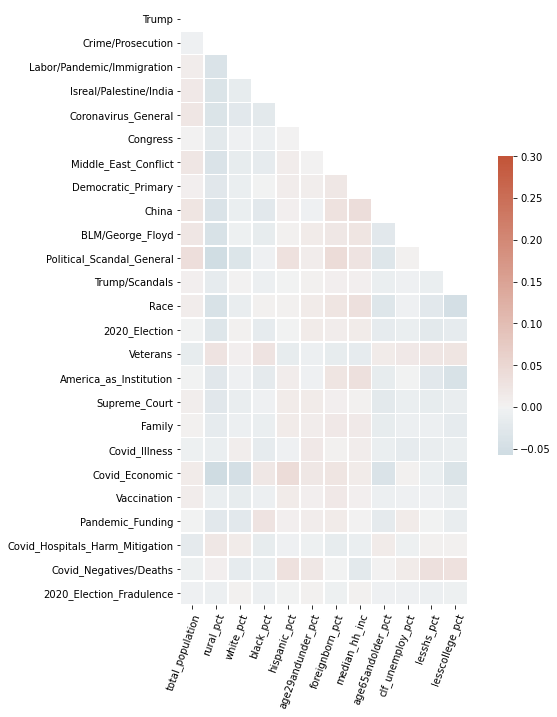

In [75]:
def plotCorrDfs(df1, df2): 
    corr = []
    for i, col1 in enumerate(df1.columns): 
        corr.append([])
        for j, col2 in enumerate(df2.columns): 
            corr[i].append(df1[col1].corr(df2[col2], method="pearson"))
    corr = np.array(corr)
    
    fig, ax = plt.subplots(figsize=(11,11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    ax.xaxis.set_ticklabels(df2.columns, rotation=70, ha="right", rotation_mode="anchor")
    ax.yaxis.set_ticklabels(df1.columns, rotation=0)
    
    plt.show()
    
plotCorrDfs(df1, df2)

In [76]:
df2["rural_pct"].corr(df1["Race"])

-0.040282466716799165

In [77]:
# NOTE: do we need to normalize by population? Since rural will always be correlated with less articles 

rural_pct
white_pct
black_pct
hispanic_pct
age29andunder_pct
foreignborn_pct
age65andolder_pct
clf_unemploy_pct
lesshs_pct
lesscollege_pct


Text(0.5, 1.0, 'Demographic Marginals')

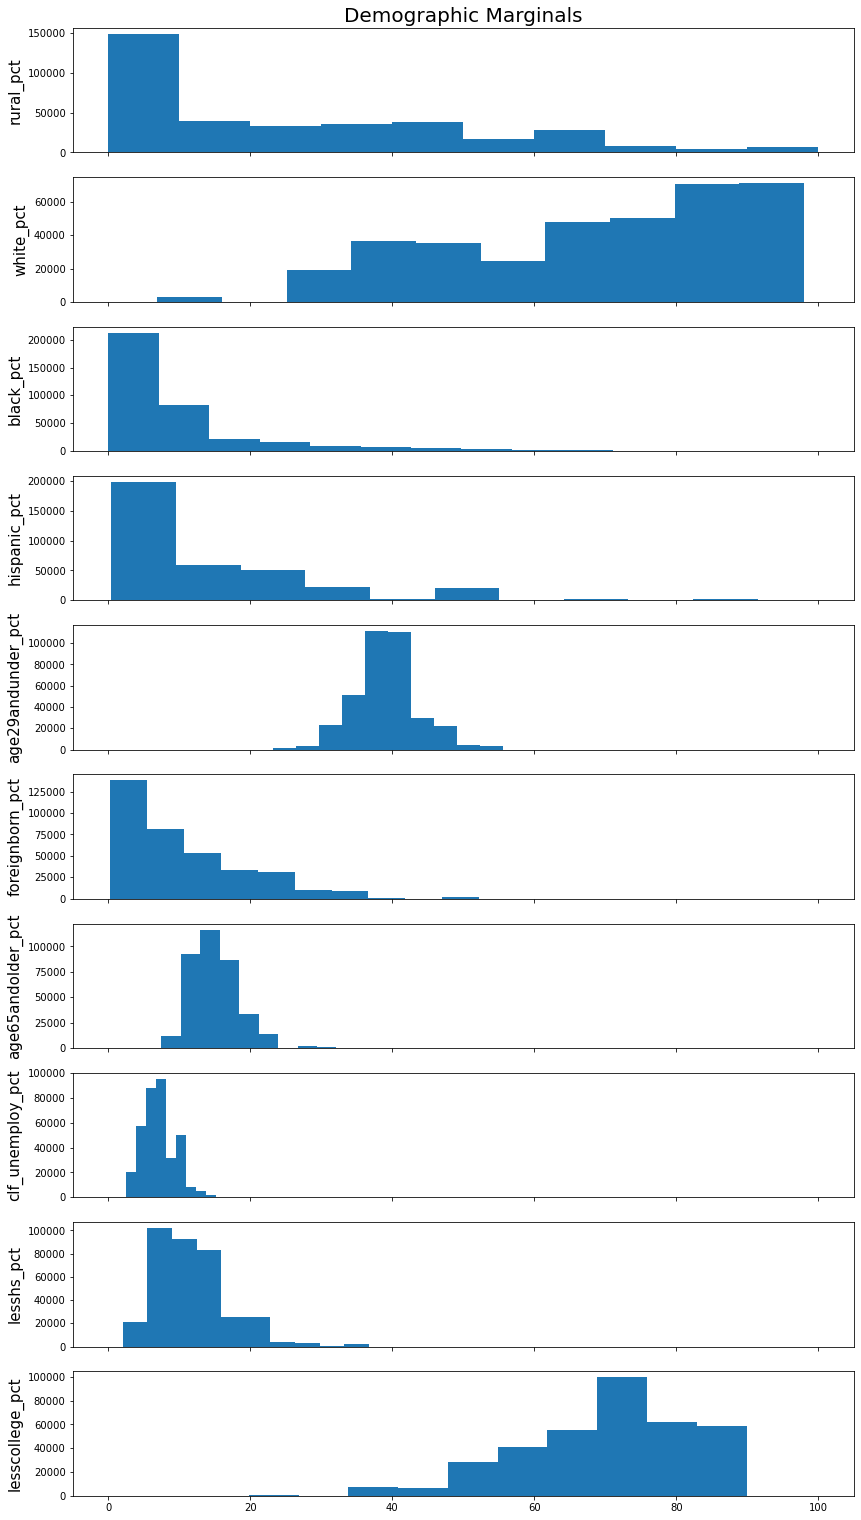

In [78]:
#get distributions of variables 
inDf = df2.drop(columns=["total_population", "median_hh_inc"])

fig, ax = plt.subplots(nrows = len(inDf.columns), figsize=[14, 27], sharex=True)
for i, colName in enumerate(inDf.columns): 
    print(colName)
    ax[i].hist(inDf[colName])
    ax[i].set_ylabel(colName, size=15)
    
ax[0].set_title("Demographic Marginals", size=20)

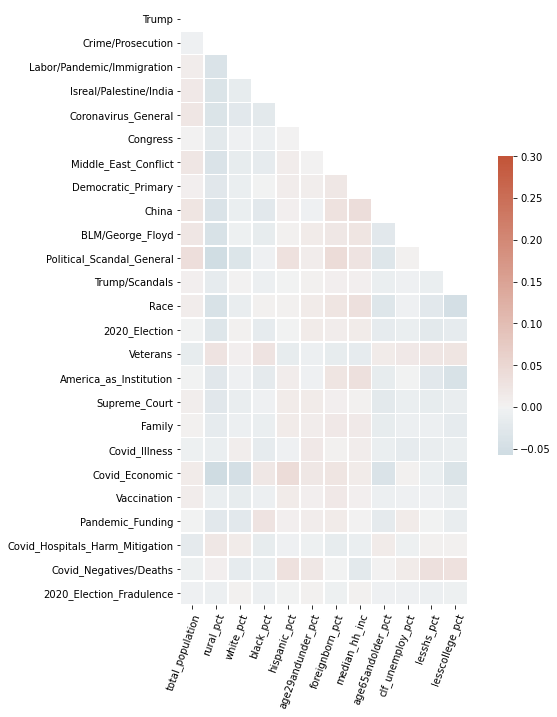

In [79]:
def plotCorrDfs(df1, df2): 
    corr = []
    for i, col1 in enumerate(df1.columns): 
        corr.append([])
        for j, col2 in enumerate(df2.columns): 
            corr[i].append(df1[col1].corr(df2[col2], method="pearson"))
    corr = np.array(corr)
    
    fig, ax = plt.subplots(figsize=(11,11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    ax.xaxis.set_ticklabels(df2.columns, rotation=70, ha="right", rotation_mode="anchor")
    ax.yaxis.set_ticklabels(df1.columns, rotation=0)
    
    plt.show()
    
plotCorrDfs(df1, df2)

In [80]:
df1 = articleTopics[["Trump", "Crime/Prosecution", "Labor/Pandemic/Immigration", "Isreal/Palestine/India", "Coronavirus_General", "Congress", "Middle_East_Conflict", "Democratic_Primary", "China", "BLM/George_Floyd", "Political_Scandal_General", "Trump/Scandals", "Race", "2020_Election", "Veterans","America_as_Institution", "Supreme_Court", "Family", "Covid_Illness", "Covid_Economic", "Vaccination", "Pandemic_Funding", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths", "2020_Election_Fradulence", "Wildlife_Farms", "Religion"]]

In [81]:
df1

,Trump,Crime/Prosecution,Labor/Pandemic/Immigration,Isreal/Palestine/India,Coronavirus_General,Congress,Middle_East_Conflict,Democratic_Primary,China,BLM/George_Floyd,...,Family,Covid_Illness,Covid_Economic,Vaccination,Pandemic_Funding,Covid_Hospitals_Harm_Mitigation,Covid_Negatives/Deaths,2020_Election_Fradulence,Wildlife_Farms,Religion
1,0.000768,0.000407,0.000310,0.000165,0.224966,0.000508,0.000265,0.000363,0.000425,0.000531,...,0.000744,0.000438,0.000443,0.000342,0.017928,0.121360,0.086689,0.000309,0.000324,0.000195
2,0.022823,0.000107,0.000081,0.000043,0.000244,0.000133,0.000069,0.000095,0.000111,0.000139,...,0.000195,0.000115,0.000116,0.000090,0.000182,0.000190,0.000137,0.000081,0.000085,0.000051
3,0.000707,0.000375,0.000285,0.000152,0.000855,0.000468,0.000244,0.000334,0.000391,0.000489,...,0.000685,0.000403,0.016274,0.000314,0.000639,0.000668,0.000480,0.000284,0.000299,0.000179
4,0.000216,0.000115,0.000087,0.000046,0.000262,0.145756,0.000075,0.237936,0.004973,0.000150,...,0.000210,0.000123,0.000125,0.000096,0.000196,0.000204,0.000147,0.000087,0.000091,0.000055
5,0.000446,0.100210,0.000180,0.000096,0.000539,0.000295,0.000154,0.000211,0.000246,0.000308,...,0.000432,0.000254,0.000257,0.000198,0.280330,0.000421,0.000302,0.000179,0.120157,0.000113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806155,0.000240,0.000127,0.000097,0.000051,0.000290,0.000159,0.000083,0.000113,0.000132,0.000166,...,0.000232,0.000136,0.000138,0.000107,0.000217,0.000226,0.005538,0.000096,0.000101,0.000061
806156,0.000116,0.000061,0.000047,0.000025,0.000140,0.007868,0.000040,0.000055,0.000064,0.000080,...,0.000112,0.000066,0.000067,0.020829,0.000105,0.000109,0.000079,0.000047,0.000049,0.000029
806157,0.000348,0.000185,0.000141,0.000075,0.000421,0.000230,0.000120,0.000165,0.000192,0.008052,...,0.000337,0.000198,0.000201,0.000155,0.000315,0.000329,0.000236,0.000140,0.000147,0.000088
806158,0.000316,0.000168,0.000128,0.000068,0.000382,0.000209,0.000109,0.000149,0.099447,0.000218,...,0.000306,0.000180,0.021455,0.000141,0.000286,0.000298,0.000214,0.000127,0.000133,0.000080


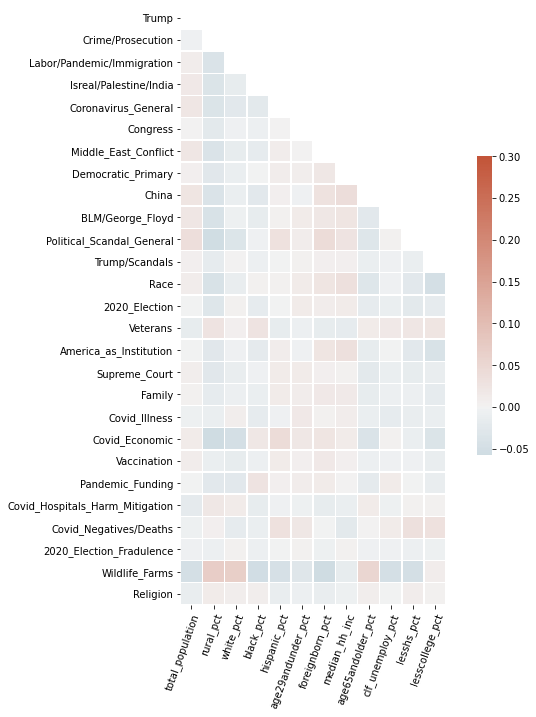

In [82]:
def plotCorrDfs(df1, df2): 
    corr = []
    for i, col1 in enumerate(df1.columns): 
        corr.append([])
        for j, col2 in enumerate(df2.columns): 
            corr[i].append(df1[col1].corr(df2[col2], method="pearson"))
    corr = np.array(corr)
    
    fig, ax = plt.subplots(figsize=(11,11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    ax.xaxis.set_ticklabels(df2.columns, rotation=70, ha="right", rotation_mode="anchor")
    ax.yaxis.set_ticklabels(df1.columns, rotation=0)
    
    plt.show()
    
plotCorrDfs(df1, df2)

In [83]:
articleTopics["rural_pct"].corr(articleTopics["Wildlife_Farms"], method="pearson")
articleTopics["white_pct"].corr(articleTopics["Wildlife_Farms"], method="pearson")

0.06655551797344107

In [84]:
medianCoverage = articleTopics[["source", "Trump", "Crime/Prosecution", "Labor/Pandemic/Immigration", "Isreal/Palestine/India", "Coronavirus_General", "Congress", "Middle_East_Conflict", "Democratic_Primary", "China", "BLM/George_Floyd", "Political_Scandal_General", "Trump/Scandals", "Race", "2020_Election", "Veterans","America_as_Institution", "Supreme_Court", "Family", "Covid_Illness", "Covid_Economic", "Vaccination", "Pandemic_Funding", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths", "2020_Election_Fradulence", "Wildlife_Farms", "Religion", "total_population", "rural_pct", "white_pct", "black_pct", "hispanic_pct", "age29andunder_pct", "foreignborn_pct","median_hh_inc" ,"age65andolder_pct", "clf_unemploy_pct", "lesshs_pct", "lesscollege_pct"]].groupby(by="source").agg(np.median).dropna()

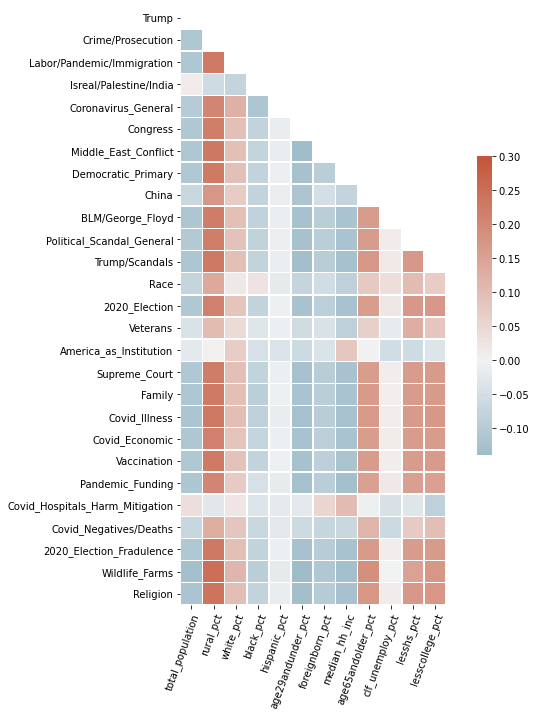

In [85]:
outletCorrs = medianCoverage.corr()
corr = outletCorrs.loc[["Trump", "Crime/Prosecution", "Labor/Pandemic/Immigration", "Isreal/Palestine/India", "Coronavirus_General", "Congress", "Middle_East_Conflict", "Democratic_Primary", "China", "BLM/George_Floyd", "Political_Scandal_General", "Trump/Scandals", "Race", "2020_Election", "Veterans","America_as_Institution", "Supreme_Court", "Family", "Covid_Illness", "Covid_Economic", "Vaccination", "Pandemic_Funding", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths", "2020_Election_Fradulence", "Wildlife_Farms", "Religion"], ["total_population", "rural_pct", "white_pct", "black_pct", "hispanic_pct", "age29andunder_pct", "foreignborn_pct","median_hh_inc" ,"age65andolder_pct", "clf_unemploy_pct", "lesshs_pct", "lesscollege_pct"]]

fig, ax = plt.subplots(figsize=(11,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.xaxis.set_ticklabels(df2.columns, rotation=70, ha="right", rotation_mode="anchor")
ax.yaxis.set_ticklabels(df1.columns, rotation=0)

plt.show()

In [90]:
articleTopics[["source", "total_population", "rural_pct", "white_pct", "black_pct", "hispanic_pct", "age29andunder_pct", "foreignborn_pct","median_hh_inc" ,"age65andolder_pct", "clf_unemploy_pct", "lesshs_pct", "lesscollege_pct"]].groupby("source").nth(0).dropna()

,total_population,rural_pct,white_pct,black_pct,hispanic_pct,age29andunder_pct,foreignborn_pct,median_hh_inc,age65andolder_pct,clf_unemploy_pct,lesshs_pct,lesscollege_pct
source,,,,,,,,,,,,
addisoncountyindependent,36926.0,78.430786,93.107834,0.974923,2.071711,36.359203,4.387153,61020.0,16.974489,4.961464,7.484448,64.225998
advertiserdemocrat,57299.0,83.111717,95.720695,0.342065,1.200719,31.929005,1.865652,42197.0,19.246408,7.362463,8.485965,81.849266
alamedatimesstar,1605217.0,0.388606,32.630917,11.015271,22.555828,38.592541,31.694220,79831.0,12.440623,7.111589,12.700590,56.112171
albertleatribune,30751.0,42.831547,86.774414,1.300771,9.365549,34.197262,3.908816,48827.0,21.465969,4.559650,11.054219,83.244949
albuquerquejournal,674777.0,4.195519,39.933784,2.511348,49.137272,40.187202,10.519475,48994.0,14.161419,7.306891,11.946342,67.216515
...,...,...,...,...,...,...,...,...,...,...,...,...
wilmingtonnewsjournal,41854.0,54.638439,93.510773,2.362976,1.579299,39.281788,1.099059,48675.0,15.245854,6.585174,11.526682,83.508087
winstoncountyjournal,18519.0,75.914154,50.526485,47.788757,1.139370,37.588421,0.431989,32820.0,17.743938,11.445414,21.968863,82.740997
wisconsinnewspaperassociation,516818.0,12.329918,80.583107,5.022851,6.208762,42.692593,8.255711,64773.0,11.936310,4.380147,4.746468,50.973843


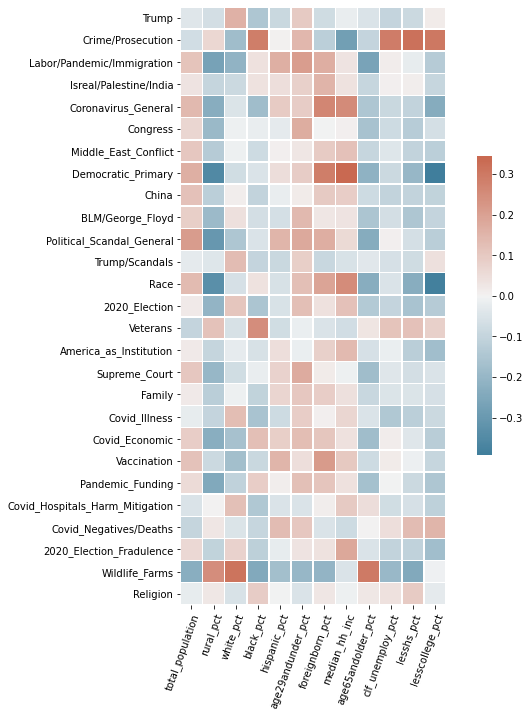

In [91]:
#group by source and get topic percentages within source. Demographics aren't averaged because they're all the 
#same within a given source 
avgCoverage = articleTopics[["source", "Trump", "Crime/Prosecution", "Labor/Pandemic/Immigration", "Isreal/Palestine/India", "Coronavirus_General", "Congress", "Middle_East_Conflict", "Democratic_Primary", "China", "BLM/George_Floyd", "Political_Scandal_General", "Trump/Scandals", "Race", "2020_Election", "Veterans","America_as_Institution", "Supreme_Court", "Family", "Covid_Illness", "Covid_Economic", "Vaccination", "Pandemic_Funding", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths", "2020_Election_Fradulence", "Wildlife_Farms", "Religion", "total_population", "rural_pct", "white_pct", "black_pct", "hispanic_pct", "age29andunder_pct", "foreignborn_pct","median_hh_inc" ,"age65andolder_pct", "clf_unemploy_pct", "lesshs_pct", "lesscollege_pct"]].groupby(by="source").agg(np.mean).dropna()

#correlations between every column 
outletCorrs = avgCoverage.corr()

#subset 
corr = outletCorrs.loc[["Trump", "Crime/Prosecution", "Labor/Pandemic/Immigration", "Isreal/Palestine/India", "Coronavirus_General", "Congress", "Middle_East_Conflict", "Democratic_Primary", "China", "BLM/George_Floyd", "Political_Scandal_General", "Trump/Scandals", "Race", "2020_Election", "Veterans","America_as_Institution", "Supreme_Court", "Family", "Covid_Illness", "Covid_Economic", "Vaccination", "Pandemic_Funding", "Covid_Hospitals_Harm_Mitigation", "Covid_Negatives/Deaths", "2020_Election_Fradulence", "Wildlife_Farms", "Religion"], ["total_population", "rural_pct", "white_pct", "black_pct", "hispanic_pct", "age29andunder_pct", "foreignborn_pct","median_hh_inc" ,"age65andolder_pct", "clf_unemploy_pct", "lesshs_pct", "lesscollege_pct"]]

fig, ax = plt.subplots(figsize=(11,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.xaxis.set_ticklabels(df2.columns, rotation=70, ha="right", rotation_mode="anchor")
ax.yaxis.set_ticklabels(df1.columns, rotation=0)

plt.show()

In [92]:
corr.columns

Index(['total_population', 'rural_pct', 'white_pct', 'black_pct',
       'hispanic_pct', 'age29andunder_pct', 'foreignborn_pct', 'median_hh_inc',
       'age65andolder_pct', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct'],
      dtype='object')

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (12).

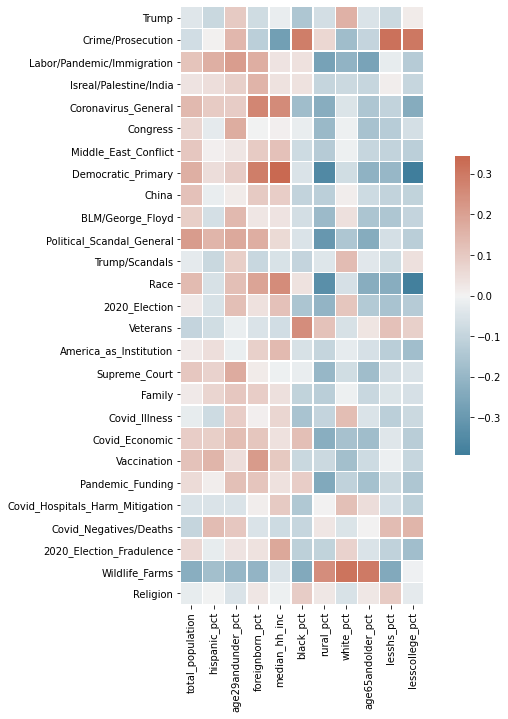

In [93]:
corr = corr[["total_population", "hispanic_pct", "age29andunder_pct", "foreignborn_pct","median_hh_inc", "black_pct", "rural_pct","white_pct", "age65andolder_pct", "lesshs_pct", "lesscollege_pct"]]
fig, ax = plt.subplots(figsize=(11,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.xaxis.set_ticklabels(df2.columns, rotation=70, ha="right", rotation_mode="anchor")
ax.yaxis.set_ticklabels(df1.columns, rotation=0)

plt.show()

In [94]:
avgCoverage

,Trump,Crime/Prosecution,Labor/Pandemic/Immigration,Isreal/Palestine/India,Coronavirus_General,Congress,Middle_East_Conflict,Democratic_Primary,China,BLM/George_Floyd,...,white_pct,black_pct,hispanic_pct,age29andunder_pct,foreignborn_pct,median_hh_inc,age65andolder_pct,clf_unemploy_pct,lesshs_pct,lesscollege_pct
source,,,,,,,,,,,,,,,,,,,,,
addisoncountyindependent,0.003257,0.000860,0.000868,0.000175,0.022799,0.003222,0.000889,0.002848,0.000450,0.002743,...,93.107834,0.974923,2.071711,36.359203,4.387153,61020.0,16.974489,4.961464,7.484448,64.225998
advertiserdemocrat,0.002564,0.001785,0.002417,0.001227,0.009799,0.001555,0.001527,0.001587,0.001594,0.002708,...,95.720695,0.342065,1.200719,31.929005,1.865652,42197.0,19.246408,7.362463,8.485965,81.849266
alamedatimesstar,0.002237,0.084673,0.005741,0.001884,0.016990,0.004403,0.001010,0.004013,0.002023,0.035162,...,32.630917,11.015271,22.555828,38.592541,31.694220,79831.0,12.440623,7.111589,12.700590,56.112171
albertleatribune,0.007827,0.026911,0.004999,0.000486,0.022297,0.020568,0.001698,0.005424,0.001141,0.023035,...,86.774414,1.300771,9.365549,34.197262,3.908816,48827.0,21.465969,4.559650,11.054219,83.244949
albuquerquejournal,0.012721,0.026347,0.014936,0.006016,0.036780,0.025887,0.014121,0.011678,0.011049,0.023384,...,39.933784,2.511348,49.137272,40.187202,10.519475,48994.0,14.161419,7.306891,11.946342,67.216515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wilmingtonnewsjournal,0.007854,0.033352,0.005422,0.001300,0.014068,0.015189,0.002839,0.005235,0.003271,0.007155,...,93.510773,2.362976,1.579299,39.281788,1.099059,48675.0,15.245854,6.585174,11.526682,83.508087
winstoncountyjournal,0.001821,0.008732,0.002230,0.000305,0.004802,0.014795,0.000751,0.004520,0.001478,0.002863,...,50.526485,47.788757,1.139370,37.588421,0.431989,32820.0,17.743938,11.445414,21.968863,82.740997
wisconsinnewspaperassociation,0.000751,0.005752,0.009381,0.000057,0.024698,0.007209,0.000219,0.009584,0.002230,0.019750,...,80.583107,5.022851,6.208762,42.692593,8.255711,64773.0,11.936310,4.380147,4.746468,50.973843


In [95]:
list(articleTopics.columns)

['index',
 'docNum',
 'Trump',
 'Crime/Prosecution',
 'Subscription_Service',
 'Media',
 'Labor/Pandemic/Immigration',
 'Isreal/Palestine/India',
 'School/Universities',
 'Royal_Family/Stars',
 'NS1',
 'Outdoor Sports',
 'Business',
 'Data/Information/Privacy',
 'Coronavirus_General',
 'States1',
 'Congress',
 'Middle_East_Conflict',
 'NS2',
 'Community',
 'Military',
 'Democratic_Primary',
 'NS3',
 'NS4',
 'China',
 'BLM/George_Floyd',
 'Sports1',
 'Police_Activity',
 'Months',
 'Trump/Scandals',
 'Southern/Midwestern/Eastern_States',
 'Southwestern_States',
 'Severe_Weather',
 'Travel/Flights',
 'Baseball',
 'Religion',
 'Basketball',
 'Race',
 'Construction',
 'Europe',
 'Political_Scandal_General',
 '2020_Election',
 'Veterans',
 'America_as_Institution',
 'Hockey',
 'Family',
 'German_Words',
 'Art/Books/Museums',
 'Football',
 'Food Service',
 'NS5',
 'Supreme_Court',
 'Covid_Illness',
 'Sports2',
 'Climate_Fossil_Fuel',
 'Death/Funeral',
 'Covid_Economic',
 'Vaccination',
 'Pand

In [96]:
#output a version of grouped data that can be easily worked with in R without processing 
outletInfo = articleTopics[["source", "city", "state", "national"]].groupby("source").nth(0).dropna()
sourceCol = articleTopics.columns.get_loc("source")
selectCols = [sourceCol] + list(range(2,73)) 
meanInfo = articleTopics.iloc[:, selectCols].groupby("source").agg(np.mean)
mergedData = pd.merge(meanInfo, outletInfo, how="inner", on="source").dropna().reset_index()

In [97]:
## create a correlation plot with only strong correlations 
allAverages = articleTopics[['source', 'Trump', 'Crime/Prosecution', 'Subscription_Service', 'Media', 'Labor/Pandemic/Immigration', 'Isreal/Palestine/India', 'School/Universities', 
 'Royal_Family/Stars', 'NS1', 'Outdoor Sports', 'Business', 'Data/Information/Privacy', 'Coronavirus_General', 'States1', 'Congress', 'Middle_East_Conflict', 'NS2', 'Community', 'Military', 'Democratic_Primary', 'NS3', 'NS4', 'China', 'BLM/George_Floyd', 'Sports1', 'Police_Activity', 'Months', 'Trump/Scandals', 'Southern/Midwestern/Eastern_States', 
 'Southwestern_States', 'Severe_Weather', 'Travel/Flights', 'Baseball', 'Religion', 'Basketball', 'Race', 'Construction', 'Europe', 'Political_Scandal_General', 
 '2020_Election', 'Veterans', 'America_as_Institution', 'Hockey', 'Family', 'German_Words','Art/Books/Museums', 'Football', 'Food Service', 
 'NS5', 'Supreme_Court', 'Covid_Illness', 'Sports2', 'Climate_Fossil_Fuel', 'Death/Funeral', 'Covid_Economic', 'Vaccination', 
 'Pandemic_Funding', 'Covid_Hospitals_Harm_Mitigation', 'Covid_Negatives/Deaths', 'Britain', 'NS6', 'Entertainment','Health_Products', 
 'Science/Space', 'Wildlife_Farms', 'NS7', 'City_Government', 'Soccer', '2020_Election_Fradulence',
 'Community_Public_Service', 'total_population','white_pct','black_pct','hispanic_pct',
 'nonwhite_pct','foreignborn_pct','female_pct','age29andunder_pct','age65andolder_pct','median_hh_inc',
 'clf_unemploy_pct','lesshs_pct','lesscollege_pct','lesshs_whites_pct','lesscollege_whites_pct','rural_pct']].groupby("source").agg(np.mean).dropna().reset_index()

In [98]:
allAverages.to_csv("/shared/3/projects/benlitterer/localNews/MVP1/outletMeans.csv")

In [99]:
allCorrs = allAverages.corr().loc[[ 'Trump', 'Crime/Prosecution', 'Subscription_Service', 'Media', 'Labor/Pandemic/Immigration', 'Isreal/Palestine/India', 'School/Universities', 
 'Royal_Family/Stars', 'NS1', 'Outdoor Sports', 'Business', 'Data/Information/Privacy', 'Coronavirus_General', 'States1', 'Congress', 'Middle_East_Conflict', 'NS2', 'Community', 'Military', 'Democratic_Primary', 'NS3', 'NS4', 'China', 'BLM/George_Floyd', 'Sports1', 'Police_Activity', 'Months', 'Trump/Scandals', 'Southern/Midwestern/Eastern_States', 
 'Southwestern_States', 'Severe_Weather', 'Travel/Flights', 'Baseball', 'Religion', 'Basketball', 'Race', 'Construction', 'Europe', 'Political_Scandal_General', 
 '2020_Election', 'Veterans', 'America_as_Institution', 'Hockey', 'Family', 'German_Words','Art/Books/Museums', 'Football', 'Food Service', 
 'NS5', 'Supreme_Court', 'Covid_Illness', 'Sports2', 'Climate_Fossil_Fuel', 'Death/Funeral', 'Covid_Economic', 'Vaccination', 
 'Pandemic_Funding', 'Covid_Hospitals_Harm_Mitigation', 'Covid_Negatives/Deaths', 'Britain', 'NS6', 'Entertainment','Health_Products', 
 'Science/Space', 'Wildlife_Farms', 'NS7', 'City_Government', 'Soccer', '2020_Election_Fradulence',
 'Community_Public_Service'], ['total_population','white_pct','black_pct','hispanic_pct',
 'nonwhite_pct','foreignborn_pct','female_pct','age29andunder_pct','age65andolder_pct','median_hh_inc',
 'clf_unemploy_pct','lesshs_pct','lesscollege_pct','lesshs_whites_pct','lesscollege_whites_pct','rural_pct']].T
allCorrs

,Trump,Crime/Prosecution,Subscription_Service,Media,Labor/Pandemic/Immigration,Isreal/Palestine/India,School/Universities,Royal_Family/Stars,NS1,Outdoor Sports,...,NS6,Entertainment,Health_Products,Science/Space,Wildlife_Farms,NS7,City_Government,Soccer,2020_Election_Fradulence,Community_Public_Service
total_population,-0.038671,-0.068637,0.020992,-0.011016,0.115381,0.035096,-0.130580,0.161959,0.140776,0.071595,...,-0.000800,0.138033,0.091883,0.042226,-0.229008,0.036777,-0.180683,0.132302,0.063426,0.056606
white_pct,0.161358,-0.180061,0.034913,-0.034542,-0.211811,-0.085091,0.129070,-0.170846,-0.051873,0.072546,...,0.003421,-0.122880,-0.000200,0.013219,0.314555,-0.079603,0.224173,-0.033141,0.078240,-0.079973
black_pct,-0.150033,0.288743,-0.006268,-0.036419,0.039965,0.037457,0.018123,0.014086,-0.154931,-0.164448,...,-0.030870,0.031774,-0.091169,-0.129751,-0.240913,-0.008047,-0.103676,-0.043656,-0.115683,0.011067
hispanic_pct,-0.087117,0.006636,-0.034719,0.101752,0.168050,0.047718,-0.152691,0.178783,0.094567,0.044377,...,0.032151,0.102280,-0.036824,0.019389,-0.172069,0.043034,-0.137898,0.038597,-0.021590,0.032041
nonwhite_pct,-0.161358,0.180061,-0.034913,0.034542,0.211811,0.085091,-0.129070,0.170846,0.051873,-0.072546,...,-0.003421,0.122880,0.000200,-0.013219,-0.314555,0.079603,-0.224173,0.033141,-0.078240,0.079973
foreignborn_pct,-0.075340,-0.117748,-0.031977,0.022944,0.168605,0.154924,-0.094574,0.212835,0.277547,0.112047,...,-0.018052,0.183317,0.126445,0.108712,-0.208882,0.154165,-0.177024,0.099997,0.037766,0.235163
female_pct,0.020369,-0.041919,0.025858,-0.000646,0.017168,0.054666,0.100741,0.086186,0.069666,-0.264844,...,-0.002912,0.129117,-0.022922,0.020358,-0.158344,0.090159,-0.022680,-0.005456,0.081124,0.035084
age29andunder_pct,0.101508,0.145382,-0.105551,0.122481,0.210750,0.082236,-0.068600,0.007730,0.026305,-0.112080,...,0.186350,0.101078,-0.134302,0.097254,-0.197394,0.009522,-0.147143,0.010490,0.033871,-0.031883
age65andolder_pct,-0.050680,-0.097425,0.118553,-0.125740,-0.265275,-0.091897,0.076394,-0.081106,-0.148873,-0.097223,...,-0.145654,-0.158852,0.072103,-0.075924,0.298791,-0.040784,0.146570,-0.052058,-0.052753,-0.109438
median_hh_inc,-0.018023,-0.279709,-0.007450,0.042605,0.035238,0.037342,0.057643,0.111541,0.299493,0.174582,...,-0.057019,0.120089,0.161928,0.161269,-0.049171,0.118342,-0.002762,0.059670,0.184481,0.215230


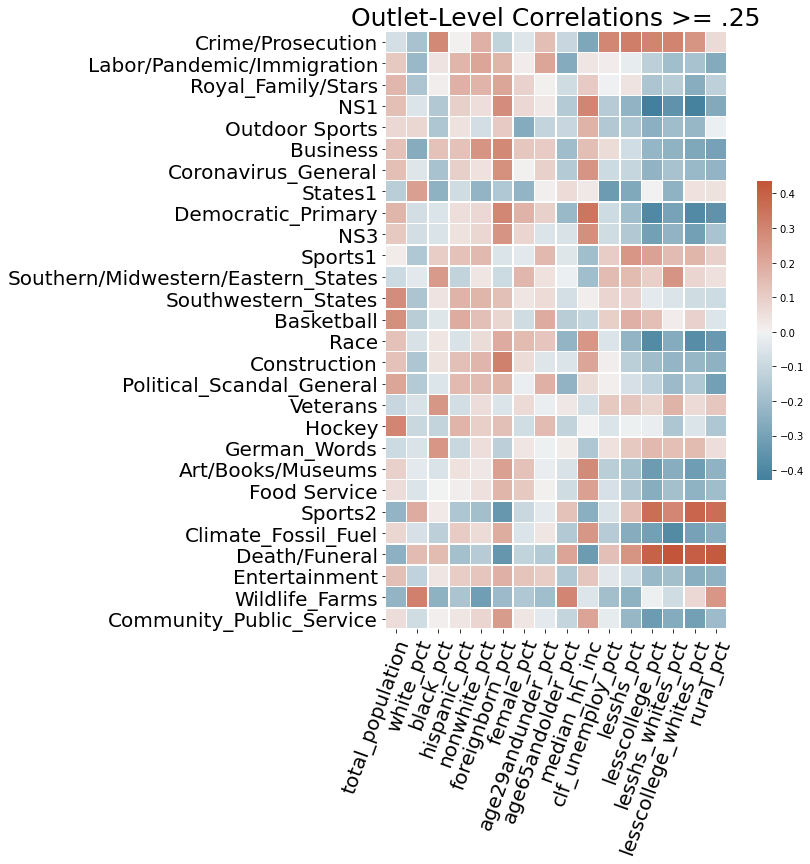

In [100]:
toKeep = []
for col in allCorrs.columns: 
    maxVal = max(allCorrs[col])
    minVal = min(allCorrs[col])
    
    ## if the strength of correlation (regardless of sign) is >= .25 for some row 
    if max([maxVal, abs(minVal)]) >= .25 and maxVal < .9: 
        toKeep.append(col)
        
bigCorrs = allCorrs[toKeep].T

fig, ax = plt.subplots(figsize=(11,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(bigCorrs, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.xaxis.set_ticklabels(bigCorrs.columns, rotation=70, ha="right", rotation_mode="anchor", size=20)
ax.yaxis.set_ticklabels(list(bigCorrs.index), ha="right", rotation_mode="anchor", size=20)
#ax.yaxis.set_ticklabels(bigCorrs.columns, rotation=0)

plt.title("Outlet-Level Correlations >= .25", size=25)
plt.show()

In [101]:
#get words for the topics in this frame 
pd.options.display.max_colwidth = 100
topicReference.loc[list(bigCorrs.index), :]

,topicNum,percentage,words
Name,,,
Crime/Prosecution,1,0.02363,num court prison said charges case charged attorney criminal jail arrested trial judge years pro...
Labor/Pandemic/Immigration,4,0.01799,num workers said work employees border people jobs immigration unemployment job labor union cana...
Royal_Family/Stars,7,0.01954,num year show star love one prince royal instagram also harry got old first queen fight fans sai...
NS1,8,0.09674,would could one even many may much like time likely might also still make less long way however ...
Outdoor Sports,9,0.01195,num race car year racing first ski aspen time last mountain two drivers run track bike season ra...
Business,10,0.02536,company num companies business new said industry amazon tech million technology firm based ceo b...
Coronavirus_General,12,0.05389,num said people coronavirus new state health pandemic covid virus restrictions public home socia...
States1,13,0.02520,num state minnesota colorado county dakota said north lake boulder denver department south utah ...
Democratic_Primary,19,0.02106,num party campaign democratic sanders republican election candidates democrats candidate voters ...


In [108]:
allCorrs

,Trump,Crime/Prosecution,Subscription_Service,Media,Labor/Pandemic/Immigration,Isreal/Palestine/India,School/Universities,Royal_Family/Stars,NS1,Outdoor Sports,...,NS6,Entertainment,Health_Products,Science/Space,Wildlife_Farms,NS7,City_Government,Soccer,2020_Election_Fradulence,Community_Public_Service
total_population,-0.038671,-0.068637,0.020992,-0.011016,0.115381,0.035096,-0.130580,0.161959,0.140776,0.071595,...,-0.000800,0.138033,0.091883,0.042226,-0.229008,0.036777,-0.180683,0.132302,0.063426,0.056606
white_pct,0.161358,-0.180061,0.034913,-0.034542,-0.211811,-0.085091,0.129070,-0.170846,-0.051873,0.072546,...,0.003421,-0.122880,-0.000200,0.013219,0.314555,-0.079603,0.224173,-0.033141,0.078240,-0.079973
black_pct,-0.150033,0.288743,-0.006268,-0.036419,0.039965,0.037457,0.018123,0.014086,-0.154931,-0.164448,...,-0.030870,0.031774,-0.091169,-0.129751,-0.240913,-0.008047,-0.103676,-0.043656,-0.115683,0.011067
hispanic_pct,-0.087117,0.006636,-0.034719,0.101752,0.168050,0.047718,-0.152691,0.178783,0.094567,0.044377,...,0.032151,0.102280,-0.036824,0.019389,-0.172069,0.043034,-0.137898,0.038597,-0.021590,0.032041
nonwhite_pct,-0.161358,0.180061,-0.034913,0.034542,0.211811,0.085091,-0.129070,0.170846,0.051873,-0.072546,...,-0.003421,0.122880,0.000200,-0.013219,-0.314555,0.079603,-0.224173,0.033141,-0.078240,0.079973
foreignborn_pct,-0.075340,-0.117748,-0.031977,0.022944,0.168605,0.154924,-0.094574,0.212835,0.277547,0.112047,...,-0.018052,0.183317,0.126445,0.108712,-0.208882,0.154165,-0.177024,0.099997,0.037766,0.235163
female_pct,0.020369,-0.041919,0.025858,-0.000646,0.017168,0.054666,0.100741,0.086186,0.069666,-0.264844,...,-0.002912,0.129117,-0.022922,0.020358,-0.158344,0.090159,-0.022680,-0.005456,0.081124,0.035084
age29andunder_pct,0.101508,0.145382,-0.105551,0.122481,0.210750,0.082236,-0.068600,0.007730,0.026305,-0.112080,...,0.186350,0.101078,-0.134302,0.097254,-0.197394,0.009522,-0.147143,0.010490,0.033871,-0.031883
age65andolder_pct,-0.050680,-0.097425,0.118553,-0.125740,-0.265275,-0.091897,0.076394,-0.081106,-0.148873,-0.097223,...,-0.145654,-0.158852,0.072103,-0.075924,0.298791,-0.040784,0.146570,-0.052058,-0.052753,-0.109438
median_hh_inc,-0.018023,-0.279709,-0.007450,0.042605,0.035238,0.037342,0.057643,0.111541,0.299493,0.174582,...,-0.057019,0.120089,0.161928,0.161269,-0.049171,0.118342,-0.002762,0.059670,0.184481,0.215230


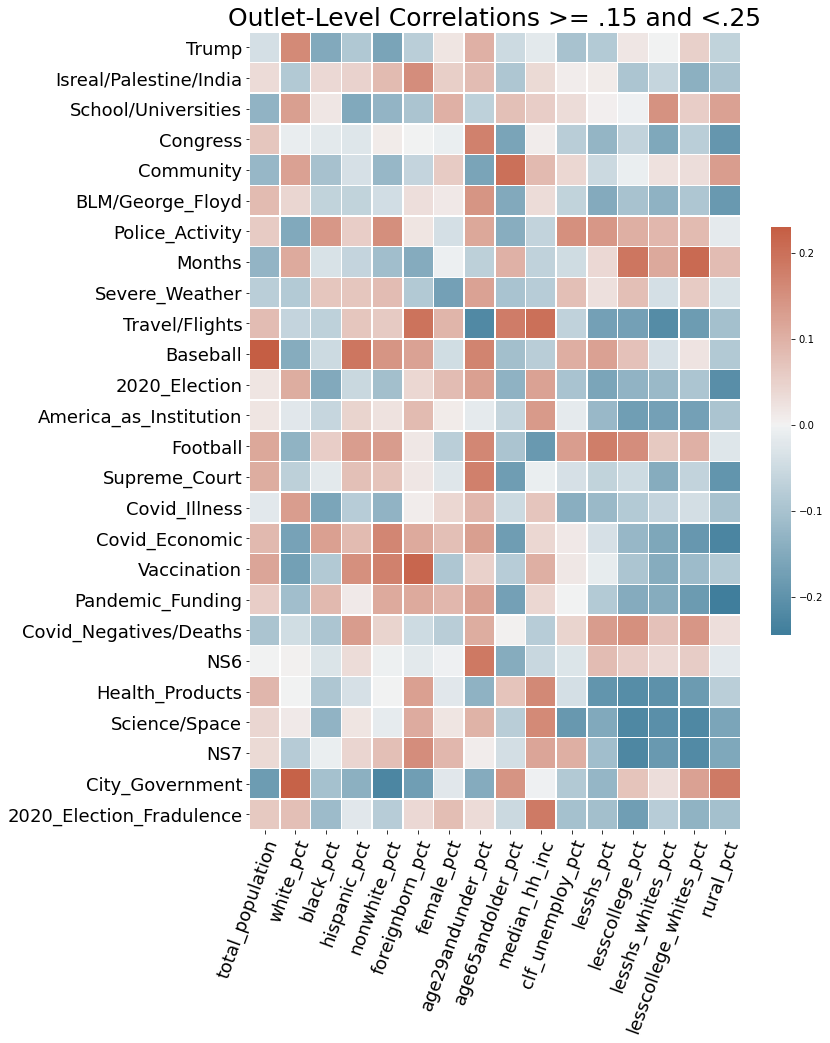

In [109]:
## between .15 and .25
toKeep = []
for col in allCorrs.columns: 
    maxVal = max(allCorrs[col])
    minVal = min(allCorrs[col])
    
    ## if the strength of correlation (regardless of sign) is >= .25 for some row 
    if max([maxVal, abs(minVal)]) >= .15 and max([maxVal, abs(minVal)]) < .25:
        toKeep.append(col)
        
bigCorrs = allCorrs[toKeep].T

fig, ax = plt.subplots(figsize=(11,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(bigCorrs, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.xaxis.set_ticklabels(bigCorrs.columns, rotation=70, ha="right", rotation_mode="anchor", size=18)
ax.yaxis.set_ticklabels(list(bigCorrs.index), ha="right", rotation_mode="anchor", size=18)
#ax.yaxis.set_ticklabels(bigCorrs.columns, rotation=0)

plt.title("Outlet-Level Correlations >= .15 and <.25", size=25)
plt.show()

In [110]:
#get words for the topics in this frame 
pd.options.display.max_colwidth = 100
topicReference.loc[list(bigCorrs.index), :]

,topicNum,percentage,words
Name,,,
Trump,0,0.04459,trump president said white house donald administration coronavirus told would states washington ...
Isreal/Palestine/India,5,0.00957,israel num india israeli jewish palestinian indian minister said netanyahu arab muslim governmen...
School/Universities,6,0.02926,school students schools num education district university student high learning college year tea...
Congress,14,0.02950,senate house bill said would democrats num republicans republican congress lawmakers vote commit...
Community,17,0.03270,num event community information library center free year county saturday available visit events ...
BLM/George_Floyd,23,0.03081,police said officers floyd city protests protesters people violence law officer num black enforc...
Police_Activity,25,0.03378,num police said man vehicle officers old reported year county according street block sheriff two...
Months,26,0.07794,num may june july numth per april march million percent total today oct sept year jan dec nov da...
Severe_Weather,30,0.02063,num fire said weather storm area people hurricane louisiana fires water national rain snow winds...


In [56]:
## Question: I wonder if these topics would trail something like public opinion? 
## Question: We should measure the influence of distance 
## Question: what is the difference with national news? 

## divergence from national news? does this happen and for which groups? 
## I.e. could it be true that there are local news bubbles for specific demographics that cater heavily to them? On which topics? 

In [57]:
#goal, get divergence for each demographic, for each topic 
national = articleTopics[articleTopics["national"] == True]
local = articleTopics[articleTopics["national"] == False]
mainNat = national[national["source"].isin(["foxnews", "businessinsider", "abcnews", "politico", "yahoonews", "cnn", "cbsnews", "thenewyorktimes", "thehuffingtonpost", "washingtonpost", "msnbc", "cnbc", "reuters"])]


In [58]:
avgCoverage.head(3)

,Trump,Crime/Prosecution,Labor/Pandemic/Immigration,Isreal/Palestine/India,Coronavirus_General,Congress,Middle_East_Conflict,Democratic_Primary,China,BLM/George_Floyd,...,white_pct,black_pct,hispanic_pct,age29andunder_pct,foreignborn_pct,median_hh_inc,age65andolder_pct,clf_unemploy_pct,lesshs_pct,lesscollege_pct
source,,,,,,,,,,,,,,,,,,,,,
addisoncountyindependent,0.003257,0.000860,0.000868,0.000175,0.022799,0.003222,0.000889,0.002848,0.000450,0.002743,...,93.107834,0.974923,2.071711,36.359203,4.387153,61020.0,16.974489,4.961464,7.484448,64.225998
advertiserdemocrat,0.002564,0.001785,0.002417,0.001227,0.009799,0.001555,0.001527,0.001587,0.001594,0.002708,...,95.720695,0.342065,1.200719,31.929005,1.865652,42197.0,19.246408,7.362463,8.485965,81.849266
alamedatimesstar,0.002237,0.084673,0.005741,0.001884,0.016990,0.004403,0.001010,0.004013,0.002023,0.035162,...,32.630917,11.015271,22.555828,38.592541,31.694220,79831.0,12.440623,7.111589,12.700590,56.112171


In [70]:
startLocal = min(local["date"])
endLocal = max(local["date"])
print("LOCAL:")
print(startLocal)
print(endLocal)

print("NATIONAL")
startNat = min(national["date"])
endNat = max(national["date"])
print(startNat)
print(endNat)

print("Common Time Frame")
start = max(startLocal, startNat)
print(start)
end = min(endLocal, endNat)

LOCAL:
2020-04-01 00:00:00
2021-12-31 00:00:00
NATIONAL
2020-01-01 00:00:00
2020-12-31 00:00:00
Common Time Frame
2020-04-01 00:00:00


In [96]:
#get the window of overlap for date
local = local[(local["date"] > start) & (local["date"] < end)]
localAvg = local[['source', 'Trump', 'Crime/Prosecution', 'Subscription_Service', 'Media', 'Labor/Pandemic/Immigration', 'Isreal/Palestine/India', 'School/Universities', 
 'Royal_Family/Stars', 'NS1', 'Outdoor Sports', 'Business', 'Data/Information/Privacy', 'Coronavirus_General', 'States1', 'Congress', 'Middle_East_Conflict', 'NS2', 'Community', 'Military', 'Democratic_Primary', 'NS3', 'NS4', 'China', 'BLM/George_Floyd', 'Sports1', 'Police_Activity', 'Months', 'Trump/Scandals', 'Southern/Midwestern/Eastern_States', 
 'Southwestern_States', 'Severe_Weather', 'Travel/Flights', 'Baseball', 'Religion', 'Basketball', 'Race', 'Construction', 'Europe', 'Political_Scandal_General', 
 '2020_Election', 'Veterans', 'America_as_Institution', 'Hockey', 'Family', 'German_Words','Art/Books/Museums', 'Football', 'Food Service', 
 'NS5', 'Supreme_Court', 'Covid_Illness', 'Sports2', 'Climate_Fossil_Fuel', 'Death/Funeral', 'Covid_Economic', 'Vaccination', 
 'Pandemic_Funding', 'Covid_Hospitals_Harm_Mitigation', 'Covid_Negatives/Deaths', 'Britain', 'NS6', 'Entertainment','Health_Products', 
 'Science/Space', 'Wildlife_Farms', 'NS7', 'City_Government', 'Soccer', '2020_Election_Fradulence',
 'Community_Public_Service', 'total_population','white_pct','black_pct','hispanic_pct',
 'nonwhite_pct','foreignborn_pct','female_pct','age29andunder_pct','age65andolder_pct','median_hh_inc',
 'clf_unemploy_pct','lesshs_pct','lesscollege_pct','lesshs_whites_pct','lesscollege_whites_pct','rural_pct']].groupby("source").agg(np.mean).dropna().reset_index()
localAvg

,source,Trump,Crime/Prosecution,Subscription_Service,Media,Labor/Pandemic/Immigration,Isreal/Palestine/India,School/Universities,Royal_Family/Stars,NS1,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,addisoncountyindependent,0.001095,0.000426,0.405111,0.004659,0.000645,0.000172,0.045144,0.000352,0.014504,...,50.408924,36.359203,16.974489,61020.0,4.961464,7.484448,64.225998,7.231319,64.337959,78.430786
1,advertiserdemocrat,0.002882,0.001947,0.009802,0.003938,0.002100,0.001473,0.091231,0.000629,0.011232,...,50.451141,31.929005,19.246408,42197.0,7.362463,8.485965,81.849266,8.508187,81.929604,83.111717
2,alamedatimesstar,0.002483,0.076958,0.001324,0.006475,0.007135,0.001767,0.017425,0.003589,0.017832,...,50.989182,38.592541,12.440623,79831.0,7.111589,12.700590,56.112171,3.985874,44.988838,0.388606
3,albertleatribune,0.011511,0.017655,0.000912,0.002926,0.005357,0.000682,0.022121,0.001087,0.014894,...,50.082924,34.197262,21.465969,48827.0,4.559650,11.054219,83.244949,8.568258,81.890160,42.831547
4,albuquerquejournal,0.015825,0.021488,0.007924,0.005768,0.014592,0.005149,0.016036,0.005072,0.024215,...,50.983658,40.187202,14.161419,48994.0,7.306891,11.946342,67.216515,3.566936,53.386272,4.195519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,wilmingtonnewsjournal,0.010513,0.033577,0.002315,0.009857,0.005593,0.000748,0.025459,0.002498,0.015032,...,50.396618,39.281788,15.245854,48675.0,6.585174,11.526682,83.508087,11.194760,83.467590,54.638439
306,winstoncountyjournal,0.000707,0.013138,0.251178,0.006493,0.003415,0.000087,0.051065,0.001803,0.007408,...,51.152870,37.588421,17.743938,32820.0,11.445414,21.968863,82.740997,14.285714,74.528572,75.914154
307,wisconsinnewspaperassociation,0.000751,0.005752,0.020738,0.068838,0.009381,0.000057,0.017708,0.006065,0.060036,...,50.400143,42.692593,11.936310,64773.0,4.380147,4.746468,50.973843,2.721792,49.319466,12.329918
308,wisecountymessenger,0.005008,0.010975,0.212620,0.004007,0.001610,0.001049,0.052693,0.002900,0.009821,...,49.915443,39.540016,14.248900,56396.0,6.642741,15.375493,83.092522,10.160491,81.647743,72.107498


In [92]:
national = national[(national["date"] > start) & (national["date"] < end)]
nationalMeans = national.iloc[:,2:72].mean(axis=0)
nationalMeans

Trump                         0.033241
Crime/Prosecution             0.012641
Subscription_Service          0.005155
Media                         0.030857
Labor/Pandemic/Immigration    0.008036
                                ...   
NS7                           0.008326
City_Government               0.004542
Soccer                        0.024185
2020_Election_Fradulence      0.018964
Community_Public_Service      0.011233
Length: 70, dtype: float64

In [112]:
localAvg.iloc[:,0:71].head(4)

,source,Trump,Crime/Prosecution,Subscription_Service,Media,Labor/Pandemic/Immigration,Isreal/Palestine/India,School/Universities,Royal_Family/Stars,NS1,...,NS6,Entertainment,Health_Products,Science/Space,Wildlife_Farms,NS7,City_Government,Soccer,2020_Election_Fradulence,Community_Public_Service
0,addisoncountyindependent,0.001095,0.000426,0.405111,0.004659,0.000645,0.000172,0.045144,0.000352,0.014504,...,0.040414,0.004928,0.000669,0.000166,0.004456,0.008104,0.011266,0.000199,0.006196,0.027107
1,advertiserdemocrat,0.002882,0.001947,0.009802,0.003938,0.002100,0.001473,0.091231,0.000629,0.011232,...,0.063248,0.017302,0.006958,0.000213,0.031855,0.020130,0.036585,0.001475,0.000525,0.049451
2,alamedatimesstar,0.002483,0.076958,0.001324,0.006475,0.007135,0.001767,0.017425,0.003589,0.017832,...,0.032270,0.012075,0.001119,0.001335,0.008640,0.006119,0.018125,0.000821,0.005529,0.022708
3,albertleatribune,0.011511,0.017655,0.000912,0.002926,0.005357,0.000682,0.022121,0.001087,0.014894,...,0.053949,0.003070,0.003538,0.001166,0.009851,0.012168,0.019133,0.000624,0.014436,0.026856


In [123]:
localAvg.iloc[308:,:]

,source,Trump,Crime/Prosecution,Subscription_Service,Media,Labor/Pandemic/Immigration,Isreal/Palestine/India,School/Universities,Royal_Family/Stars,NS1,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
308,wisecountymessenger,0.005008,0.010975,0.212620,0.004007,0.001610,0.001049,0.052693,0.00290,0.009821,...,49.915443,39.540016,14.248900,56396.0,6.642741,15.375493,83.092522,10.160491,81.647743,72.107498
309,yellowspringsnews,0.001911,0.002343,0.006872,0.006548,0.001974,0.000140,0.085183,0.00108,0.034346,...,50.882702,40.587250,15.497337,61116.0,6.541553,7.394979,62.352165,7.324685,63.651070,14.909669


In [113]:
#Check math for upper 3 x 3 quadrant 
print(.001095 - .033241)
print(.000426 - .012641)
print(.002882 - .033241)

-0.032146
-0.012215
-0.030359


In [168]:
differences = localAvg.iloc[:,1:71].subtract(nationalMeans, axis=1)

In [142]:
#merge in the demographic data 
differences["source"] = localAvg["source"]

justDemographic = localAvg.iloc[:, [0] + list(range(71, 87))]

#310 rows so nothing was lost here 
differences = pd.merge(differences, justDemographic, how="inner", on="source")

In [169]:
differences

,Trump,Crime/Prosecution,Subscription_Service,Media,Labor/Pandemic/Immigration,Isreal/Palestine/India,School/Universities,Royal_Family/Stars,NS1,Outdoor Sports,...,NS6,Entertainment,Health_Products,Science/Space,Wildlife_Farms,NS7,City_Government,Soccer,2020_Election_Fradulence,Community_Public_Service
0,-0.032147,-0.012215,0.399956,-0.026198,-0.007391,-0.008541,0.037612,-0.019787,-0.017968,-0.001503,...,0.012697,-0.010430,-0.008343,-0.008413,-0.001973,-0.000222,0.006725,-0.023986,-0.012768,0.015874
1,-0.030360,-0.010693,0.004646,-0.026919,-0.005936,-0.007241,0.083699,-0.019510,-0.021241,-0.001746,...,0.035531,0.001944,-0.002054,-0.008366,0.025425,0.011804,0.032043,-0.022710,-0.018438,0.038218
2,-0.030759,0.064317,-0.003832,-0.024382,-0.000901,-0.006946,0.009893,-0.016550,-0.014641,-0.002351,...,0.004554,-0.003283,-0.007893,-0.007244,0.002211,-0.002207,0.013583,-0.023364,-0.013435,0.011475
3,-0.021730,0.005014,-0.004243,-0.027931,-0.002680,-0.008031,0.014589,-0.019052,-0.017578,-0.000828,...,0.026232,-0.012287,-0.005474,-0.007413,0.003422,0.003841,0.014591,-0.023561,-0.004528,0.015624
4,-0.017417,0.008847,0.002768,-0.025089,0.006556,-0.003564,0.008504,-0.015067,-0.008257,-0.000676,...,0.015155,-0.000864,-0.004208,-0.003119,0.003427,-0.002150,0.009536,-0.023082,-0.003136,0.013286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.022728,0.020936,-0.002840,-0.021000,-0.002443,-0.007965,0.017927,-0.017641,-0.017440,0.007144,...,0.011994,-0.002130,-0.004124,-0.007174,0.005933,-0.000818,0.026362,-0.023246,0.003883,0.010568
306,-0.032535,0.000497,0.246023,-0.024364,-0.004622,-0.008626,0.043533,-0.018336,-0.025064,-0.001927,...,-0.014900,-0.009705,-0.004258,-0.005358,0.023048,0.000117,0.028064,-0.023731,-0.015654,0.070209
307,-0.032491,-0.006889,0.015583,0.037981,0.001344,-0.008656,0.010176,-0.014074,0.027564,-0.003856,...,-0.005382,-0.013974,-0.004378,-0.008385,0.011406,-0.004831,0.012214,-0.023853,0.030188,0.091023
308,-0.028233,-0.001665,0.207465,-0.026850,-0.006427,-0.007664,0.045161,-0.017238,-0.022651,-0.002644,...,-0.000776,-0.013955,-0.007248,-0.007461,-0.004218,-0.004751,0.021640,-0.022808,-0.008463,0.000343


In [162]:
#correlation between difference with national news between demographics and topics 
diffCorrs = differences.corr().iloc[:70,70:].T
diffCorrs

,Trump,Crime/Prosecution,Subscription_Service,Media,Labor/Pandemic/Immigration,Isreal/Palestine/India,School/Universities,Royal_Family/Stars,NS1,Outdoor Sports,...,NS6,Entertainment,Health_Products,Science/Space,Wildlife_Farms,NS7,City_Government,Soccer,2020_Election_Fradulence,Community_Public_Service
total_population,-0.024665,-0.051902,0.029733,-0.012848,0.130125,0.029399,-0.133412,0.142485,0.116202,0.059863,...,-0.011865,0.165636,0.071887,0.044876,-0.213032,0.033983,-0.188577,0.092288,0.034502,0.064036
white_pct,0.158486,-0.133472,0.020286,-0.027134,-0.195561,-0.079429,0.138887,-0.161843,-0.036386,0.089033,...,0.026659,-0.135192,-0.050910,-0.014530,0.316644,-0.072527,0.230135,-0.017728,0.050637,-0.076779
black_pct,-0.156304,0.224910,0.007447,-0.033004,0.028348,0.036861,0.026612,0.019176,-0.136658,-0.167064,...,-0.021350,0.025578,0.000133,-0.123297,-0.269122,-0.014248,-0.085867,-0.045667,-0.091258,-0.004232
hispanic_pct,-0.091703,-0.000976,-0.024856,0.091544,0.141763,0.044264,-0.165514,0.171637,0.086213,0.045544,...,0.001099,0.115537,0.004523,0.043905,-0.152768,0.047795,-0.153931,0.024918,-0.021342,0.037162
nonwhite_pct,-0.158486,0.133472,-0.020286,0.027134,0.195561,0.079429,-0.138887,0.161843,0.036386,-0.089033,...,-0.026659,0.135192,0.050910,0.014530,-0.316644,0.072527,-0.230135,0.017728,-0.050637,0.076779
foreignborn_pct,-0.069569,-0.100888,-0.024065,0.009589,0.188581,0.145668,-0.126751,0.206796,0.238577,0.083625,...,-0.044898,0.214394,0.136553,0.120382,-0.173958,0.160010,-0.197488,0.088782,0.012911,0.232279
female_pct,0.006741,-0.031307,0.028191,-0.010374,0.001026,0.049747,0.085184,0.084156,0.077951,-0.228331,...,0.017087,0.138063,0.073014,0.032243,-0.164219,0.089722,-0.011051,-0.007195,0.071493,0.036046
age29andunder_pct,0.096572,0.135506,-0.086922,0.119373,0.185692,0.081721,-0.074871,-0.019570,0.030882,-0.102496,...,0.155586,0.103298,0.033916,0.106926,-0.201578,0.015396,-0.157726,0.001697,0.026361,-0.048274
age65andolder_pct,-0.055059,-0.078853,0.100800,-0.118271,-0.252422,-0.088800,0.084088,-0.064908,-0.130475,-0.078426,...,-0.122500,-0.174960,-0.112501,-0.086296,0.288214,-0.033139,0.166677,-0.033161,-0.020786,-0.089250
median_hh_inc,-0.014107,-0.267536,0.003084,0.007794,0.030228,0.028112,0.035758,0.114291,0.248854,0.143516,...,-0.062646,0.144685,0.176885,0.153056,-0.018730,0.124857,-0.021346,0.047221,0.142703,0.219832


Text(0.5, 1.0, 'Correlation After Subtracting National >= .25 ')

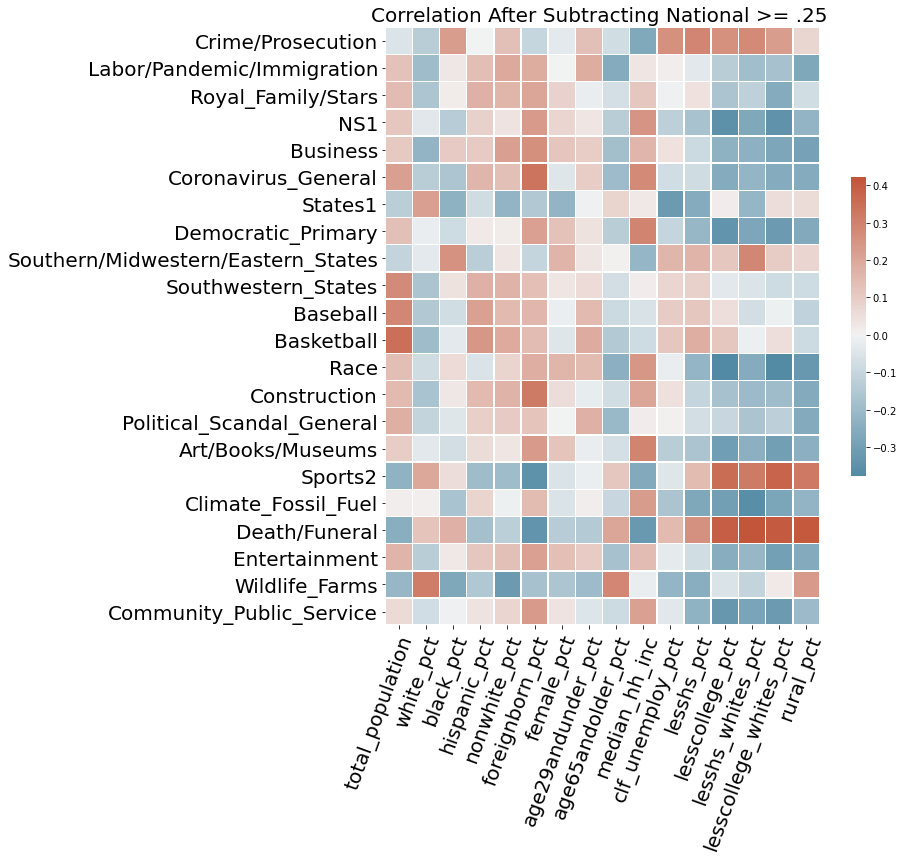

In [175]:
toKeep = []
for col in diffCorrs.columns: 
    maxVal = max(diffCorrs[col])
    minVal = min(diffCorrs[col])
    
    ## if the strength of correlation (regardless of sign) is >= .25 for some row 
    if max([maxVal, abs(minVal)]) >= .25 and maxVal < .9: 
        toKeep.append(col)
        
leanCorrs = diffCorrs[toKeep].T

fig, ax = plt.subplots(figsize=(11,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(leanCorrs, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.xaxis.set_ticklabels(leanCorrs.columns, rotation=70, ha="right", rotation_mode="anchor", size=20)
ax.yaxis.set_ticklabels(list(leanCorrs.index), ha="right", rotation_mode="anchor", size=20)

plt.title("Correlation After Subtracting National >= .25 ", size=20)

Text(0.5, 1.0, 'Correlation After Subtracting National <= .15')

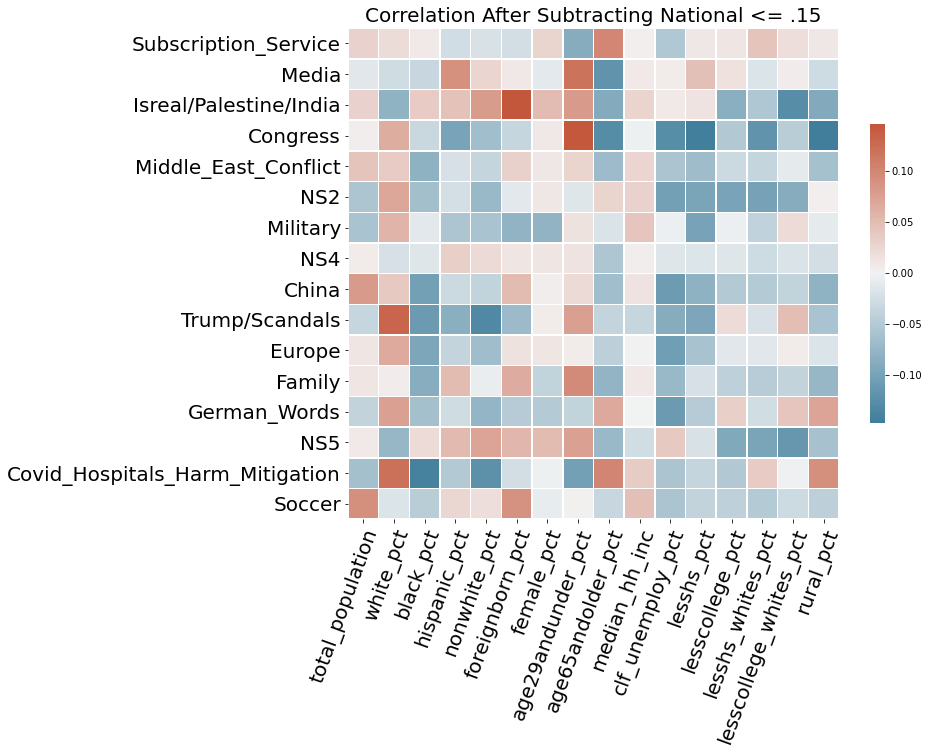

In [176]:
toKeep = []
for col in diffCorrs.columns: 
    maxVal = max(diffCorrs[col])
    minVal = min(diffCorrs[col])
    
    ## if the strength of correlation (regardless of sign) is >= .25 for some row 
    if max([maxVal, abs(minVal)]) <= .15 and maxVal < .9: 
        toKeep.append(col)
        
leanCorrs = diffCorrs[toKeep].T

fig, ax = plt.subplots(figsize=(11,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(leanCorrs, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.xaxis.set_ticklabels(leanCorrs.columns, rotation=70, ha="right", rotation_mode="anchor", size=20)
ax.yaxis.set_ticklabels(list(leanCorrs.index), ha="right", rotation_mode="anchor", size=20)

plt.title("Correlation After Subtracting National <= .15", size=20)

In [ ]:
localWeek = local.set_index(local["date"]).resample("W").mean().reset_index().drop(columns=["predrt_0", "predrt_12", "predrt_3", "published_utc", "collection_utc"])

In [ ]:
mainNatWeek = mainNat.set_index(mainNat["date"]).resample("W").mean().reset_index().drop(columns=["predrt_0", "predrt_12", "predrt_3", "published_utc", "collection_utc"])

In [ ]:
#mainNatWeek = mainNatWeek.set_index("date")
#localWeek = localWeek.set_index("date")
commonWeeks = pd.merge(mainNatWeek, localWeek, how="inner", on="date")

#get common weeks for mainstream news 
mainNatWeek = mainNatWeek.loc[commonWeeks.index]

#get common weeks for local news as well 
localWeek = localWeek.loc[commonWeeks.index]

In [ ]:
#for reference 
localWeek.iloc[:,2:72].head(3)

In [ ]:
#for reference 
mainNatWeek.iloc[:,2:72].head(3)

In [ ]:
topicDifferences = localWeek.iloc[:, 2:72] - mainNatWeek.iloc[:, 2:72]
topicSums = topicDifferences.mean()

In [ ]:
pd.DataFrame(topicSums).reset_index().rename(columns={"index":"Topic", 0:"local-national"})

In [ ]:
local